### Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from plot_confusion_matrix import plot_confusion_matrix
import obtain as ob

### Obtain and Scrubbing

In [2]:
model = ob.DATA_CLASS()
df = model.df
model.tree_dataframe()
model.df = model.tree_df
model.numerical_columns()
num_df = model.df
target = model.target
step = 10
bins = [0, df[target].quantile(.25), df[target].quantile(.75), 1.01]
num_df = num_df.drop(columns='max_payment')


### Explore

<a href='Initial_EDA.ipynb'>See Initial EDA</a>

### Model

#### Selecting Hyperparameters


```python
forest = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [15, 16, 17, 18, 19, 20], 'n_estimators':[100]}
optimal = GridSearchCV(forest, param_grid, cv=3, scoring='f1_micro')
y= pd.cut(model.target_df,bins, right=False).astype(str)
X = num_df
optimal.fit(X, y)
param_grid = optimal.best_params_
```

In [3]:
param_grid = {'criterion': 'gini', 'max_depth': 18, 'n_estimators': 100}

#### Random Forest

In [4]:
def random_forest(data, target_column='ratio_to_max_payment', show=10, n_estimators=param_grid['n_estimators'], max_depth = param_grid['max_depth']):
    y= data[target_column]
    X = data.drop(columns=[target_column])
    data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                        test_size = 0.25)


    forest = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth)
    forest.fit(data_train,target_train)
    df_feature_importance = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False)
    print(df_feature_importance[:show])
    print(forest.score(data_train,target_train), forest.score(data_test,target_test))
    return forest, df_feature_importance


In [5]:
dsd = pd.cut(model.target_df,bins, right=False).unique()
dsd = dsd.sort_values().astype(str)
num_df[target] = pd.cut(model.target_df,bins, right=False).astype(str)
#num_df[target] = num_df[target].apply(lambda x:'(0.9, 1.0]' if x == 'nan')


In [6]:
values = num_df[target].value_counts().sort_values(ascending=False)
low_class, add_sample = values.index[-1], (values.iloc[0]-values.iloc[-1] )
balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
data = num_df.append(num_df.loc[balancing_indexes], ignore_index=True)
low_class, add_sample = values.index[-2], (values.iloc[0]-values.iloc[-2] )
balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
data = data.append(num_df.loc[balancing_indexes], ignore_index=True)
model_clean, feat = random_forest(data)
X = num_df.drop(columns=[target])
pred = model_clean.predict(X)
cnf_matrix = confusion_matrix(num_df[target], pred)


with_mcc                                                               0.041732
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS                              0.034384
BRONCHITIS_&_ASTHMA                                                    0.033344
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE                                  0.031202
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.026521
SIGNS_&_SYMPTOMS                                                       0.023015
with_cc                                                                0.022602
PERC_CARDIOVASC_PROC                                                   0.021764
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone            0.020806
CHRONIC_OBSTRUCTIVE_PULMONARY_DISEASE                                  0.017111
dtype: float64
0.7855511401113128 0.7403228180346367


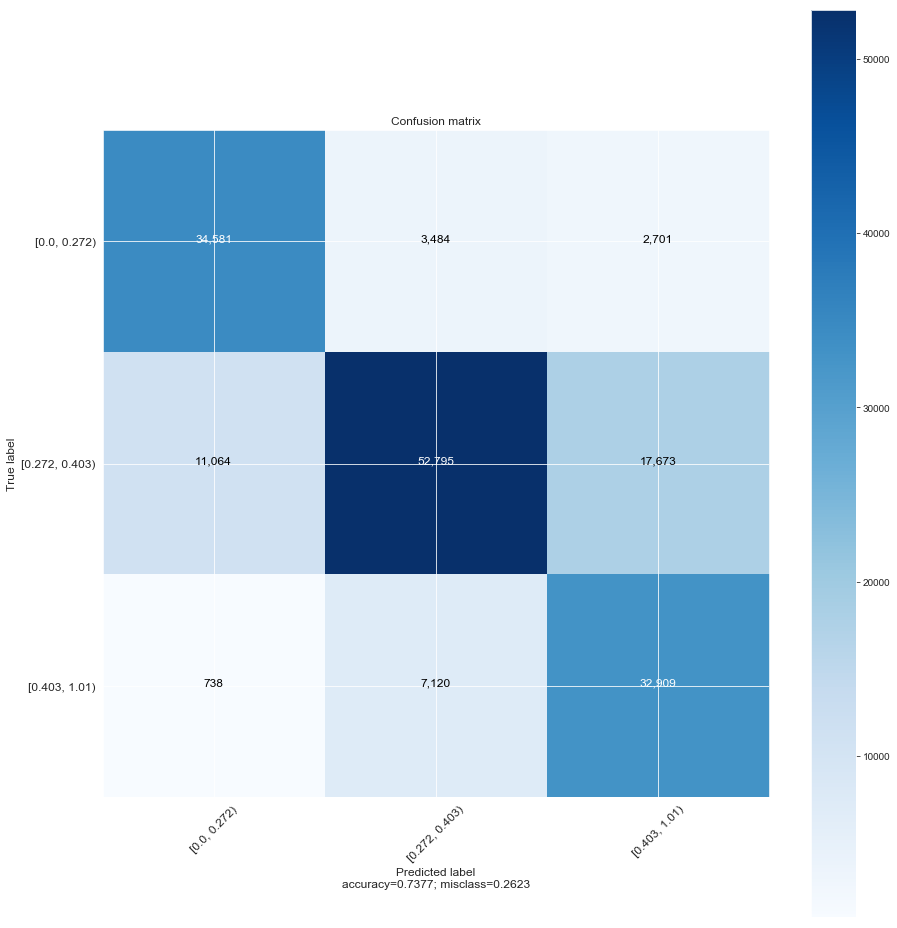

In [7]:

ax = plot_confusion_matrix(cnf_matrix, dsd, normalize=False)


PULMONARY_EDEMA_&_RESPIRATORY_FAILURE             0.059460
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS         0.054881
BRONCHITIS_&_ASTHMA                               0.052269
SIGNS_&_SYMPTOMS                                  0.045008
with_mcc                                          0.041863
PERC_CARDIOVASC_PROC                              0.035030
CHRONIC_OBSTRUCTIVE_PULMONARY_DISEASE             0.033411
ESOPHAGITIS,_GASTROENT_&_MISC_DIGEST_DISORDERS    0.033170
with_cc                                           0.023247
RESPIRATORY_INFECTIONS_&_INFLAMMATIONS            0.022747
dtype: float64
0.8768806419257773 0.862959934587081


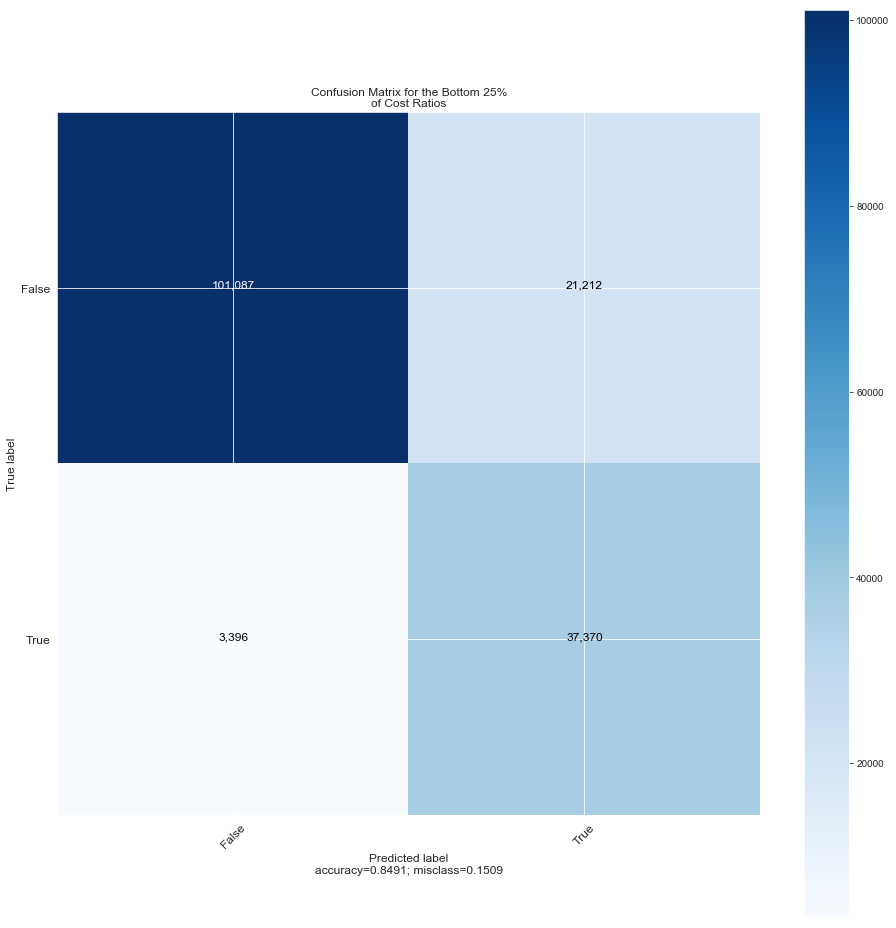

In [8]:

true_false= [False, True]

num_df[target] = df[target] < bins[1]
values = num_df[target].value_counts().sort_values(ascending=False)
low_class, add_sample = values.index[-1], (values.iloc[0]-values.iloc[-1] )
balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
data = num_df.append(num_df.loc[balancing_indexes], ignore_index=True)
model_1, feat_1 = random_forest(data, show=10)
X = num_df.drop(columns=[target])
pred = model_1.predict(X)
cnf_matrix = confusion_matrix(num_df[target], pred)
ax = plot_confusion_matrix(cnf_matrix, true_false, title="Confusion Matrix for the Bottom 25%\nof Cost Ratios",normalize=False)
plt.show()

with_mcc                                                                                         0.037231
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                      0.030533
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS                                                        0.025223
LAPAROSCOPIC_CHOLECYSTECTOMY                                                                     0.023499
with_cc                                                                                          0.021355
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                              0.021163
Percent_RACE_One_race_Asian                                                                      0.020352
Percent_HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)_Other_Hispanic_or_Latino    0.015120
Percent_RACE_One_race_Asian_Chinese                                                              0.012746
Percent_SEX_AND_AGE_Total_population          

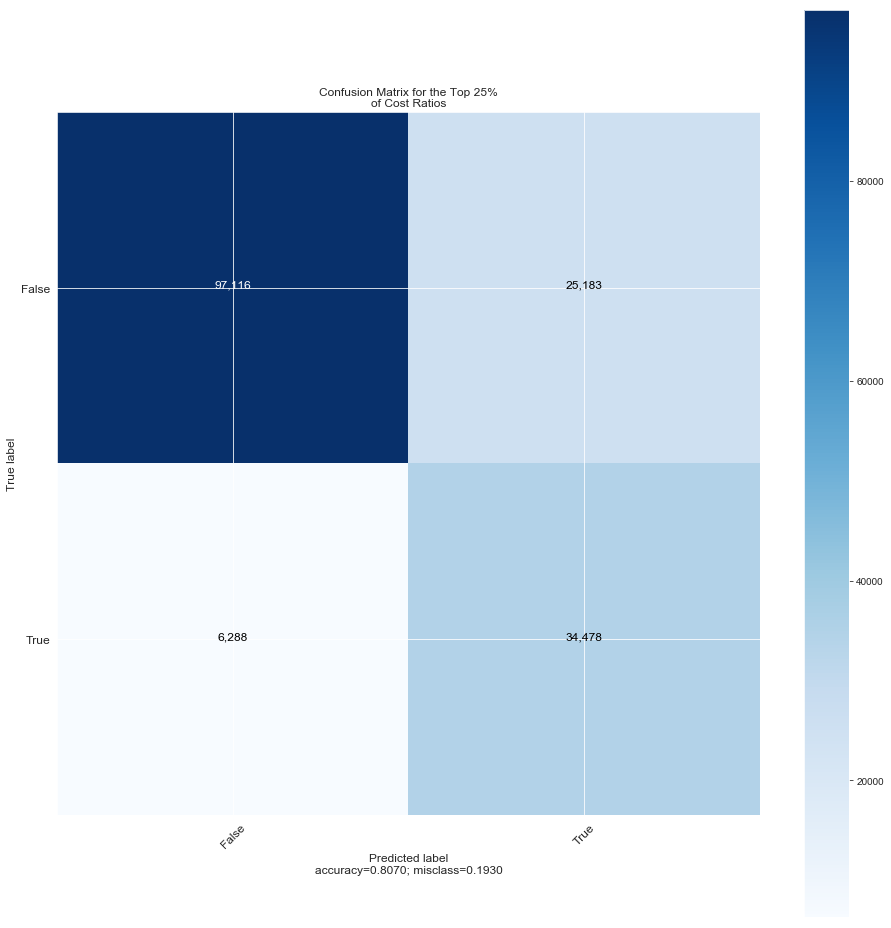

In [9]:
true_false= [False, True]

num_df[target] = df[target] > bins[2]
values = num_df[target].value_counts().sort_values(ascending=False)
low_class, add_sample = values.index[-1], (values.iloc[0]-values.iloc[-1] )
balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
data = num_df.append(num_df.loc[balancing_indexes], ignore_index=True)
model_2, feat_2 = random_forest(data, show=10)
X = num_df.drop(columns=[target])
pred = model_2.predict(X)
cnf_matrix = confusion_matrix(num_df[target], pred)
ax = plot_confusion_matrix(cnf_matrix, true_false, title="Confusion Matrix for the Top 25%\nof Cost Ratios",normalize=False)
plt.show()

#### Checking the Feature Importance 

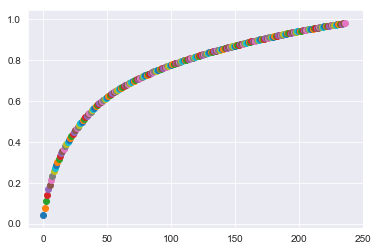

In [10]:
accumulating_importance = 0
count= 0
for i, j  in zip(feat.index, feat.values):
    accumulating_importance += j
    plt.scatter(count, accumulating_importance)
    count += 1
    if accumulating_importance > .98:
        break
plt.show()


In [26]:
a = feat.drop(index = model.cms_label_df.columns)
a.index[:10]

KeyError: "['ratio_to_max_payment'] not found in axis"

In [12]:
num_df = model.cms_label_df
num_df[target] = pd.cut(model.target_df,bins, right=False).astype(str)

for column in a.index:
    num_df[column] = df[column]
    values = num_df[target].value_counts().sort_values(ascending=False)
    low_class, add_sample = values.index[-1], (values.iloc[0]-values.iloc[-1] )
    balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
    data = num_df.append(num_df.loc[balancing_indexes], ignore_index=True)
    low_class, add_sample = values.index[-2], (values.iloc[0]-values.iloc[-2] )
    balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
    data = data.append(num_df.loc[balancing_indexes], ignore_index=True)
    model_clean, feat = random_forest(data, show=2)

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.277284
with_mcc                                                               0.052080
dtype: float64
0.7146805344322883 0.7068962697672897
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone            0.195342
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.173231
dtype: float64
0.7531221551728837 0.7233969484374233
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone            0.144437
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.140901
dtype: float64
0.7528386945548305 0.7225465665832639
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone            0.118155
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.116229
dtype: float64
0.7629288023243771 0.7338304796480727
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.106201
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone         

0.7864396801255948 0.7487612225874504
with_mcc               0.043732
BRONCHITIS_&_ASTHMA    0.039252
dtype: float64
0.7864941917829128 0.7497587859163682
with_mcc                                 0.044065
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.040399
dtype: float64
0.7890344350139278 0.7502984513238156
with_mcc                                     0.044557
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.039140
dtype: float64
0.7871265270078006 0.7491373530229439
with_mcc                                 0.043994
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.038919
dtype: float64
0.7902991054637034 0.7533565552993507
with_mcc                                 0.046499
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.039410
dtype: float64
0.7875135597747578 0.7504292793013786
with_mcc                                 0.043067
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.039919
dtype: float64
0.7902391426406538 0.7547793095553484
with_mcc                                 0.046952
PULMONARY_EDEMA_&_RESP

0.7940440563214444 0.7555642774207264
with_mcc                                     0.041857
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.036080
dtype: float64
0.7915692270792108 0.75332384830496
with_mcc               0.042396
BRONCHITIS_&_ASTHMA    0.035850
dtype: float64
0.7931991256330166 0.7529640713666618
with_mcc                                 0.045511
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.036333
dtype: float64
0.7913729851128664 0.7519992150321346
with_mcc                                     0.043106
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.036113
dtype: float64
0.7949325963357264 0.7517048520826178
with_mcc                                 0.042763
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.035750
dtype: float64
0.7934008187650929 0.7512142471667567
with_mcc                                 0.045356
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.036555
dtype: float64
0.7922778786243438 0.7459811280642366
with_mcc                                 0.045402
PULMONARY_EDEMA_

0.790233691474922 0.7489574645537949
with_mcc                                     0.040788
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.036678
dtype: float64
0.7918254318686051 0.7480253152136584
with_mcc                                     0.041153
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.038410
dtype: float64
0.7907515522194422 0.7438551734288378
with_mcc                                     0.040684
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.036001
dtype: float64
0.7956848572067137 0.7522118104956745
with_mcc               0.041812
BRONCHITIS_&_ASTHMA    0.035401
dtype: float64
0.7930737488211854 0.7472894078398665
with_mcc                                     0.041628
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.034738
dtype: float64
0.7953850430914651 0.7525388804395821
with_mcc               0.042428
BRONCHITIS_&_ASTHMA    0.034525
dtype: float64
0.7919998691720225 0.750838116731263
with_mcc                                     0.041841
CARDIAC_ARRHYTHMIA_&_CONDUCTION_

0.7864451312913266 0.7414512093411176
with_mcc                                 0.042125
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.033927
dtype: float64
0.7876879970781752 0.7453760486680077
with_mcc               0.040837
BRONCHITIS_&_ASTHMA    0.033961
dtype: float64
0.7899066215310144 0.7419745212513696
with_mcc                                     0.039714
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.035064
dtype: float64
0.7892960909690537 0.7446237877970204
with_mcc                                 0.041885
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.034025
dtype: float64
0.7911276826549357 0.7490719390341625


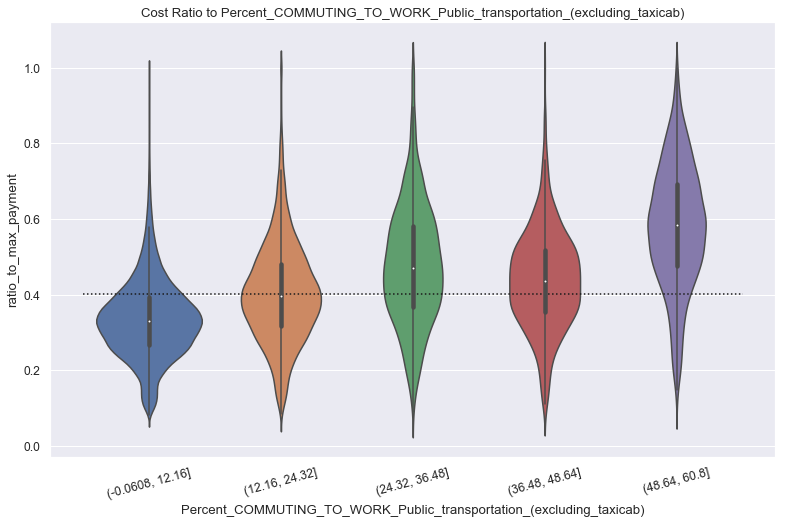

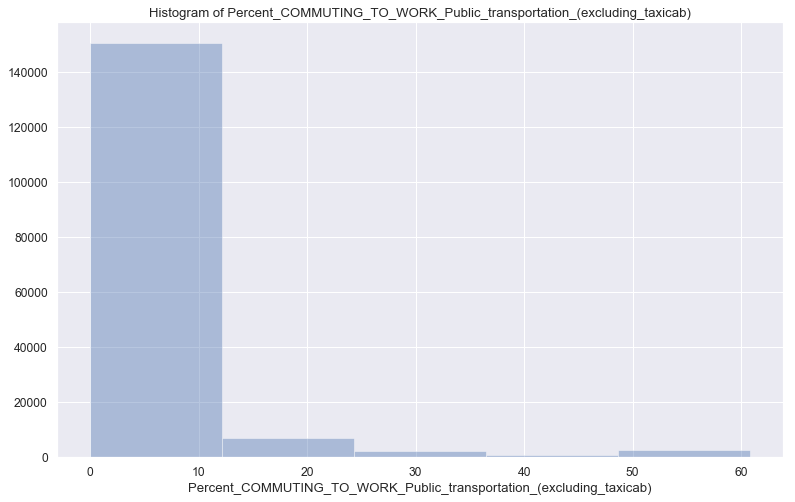

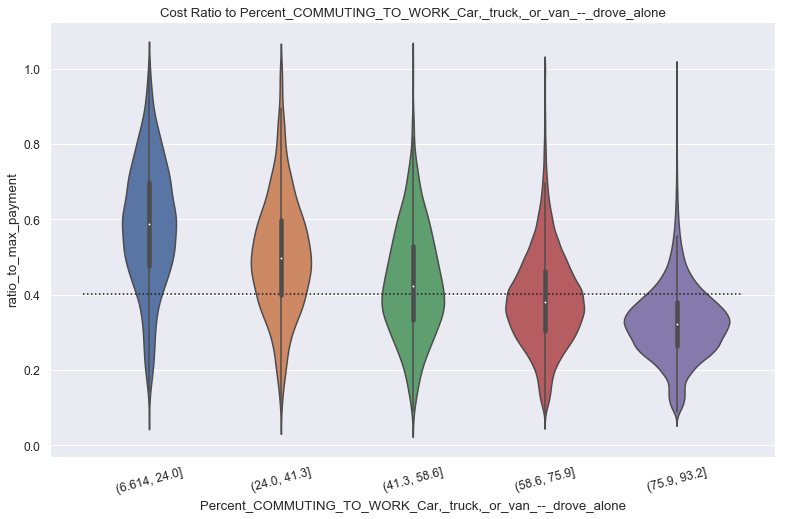

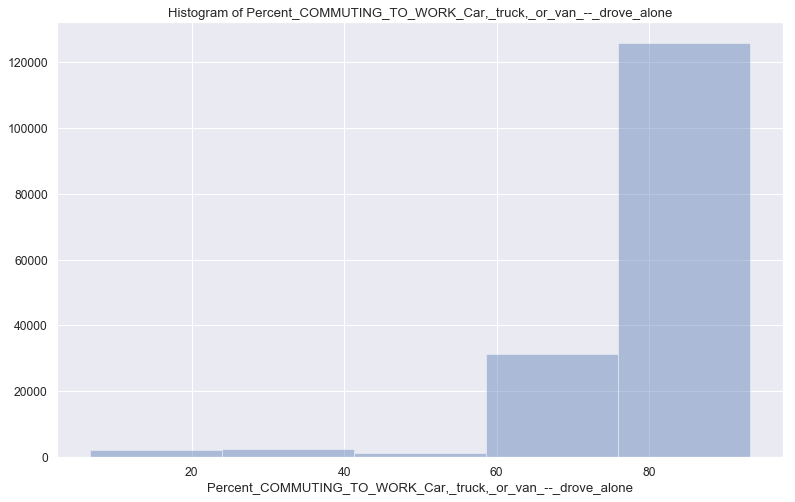

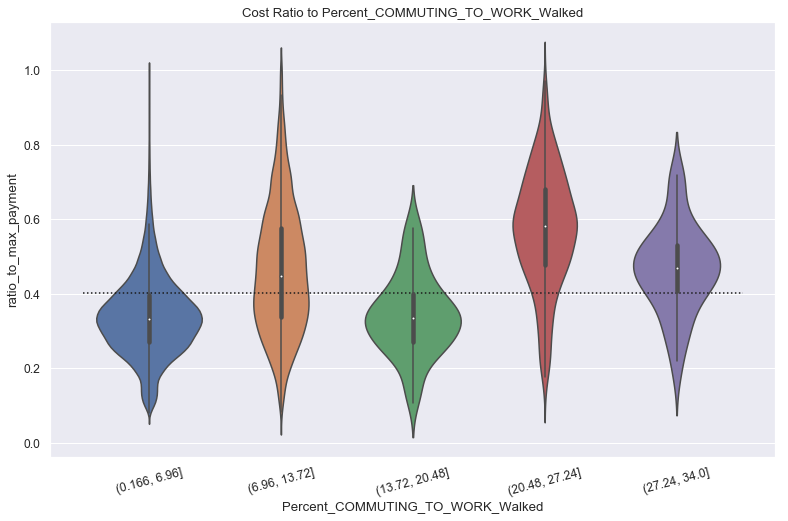

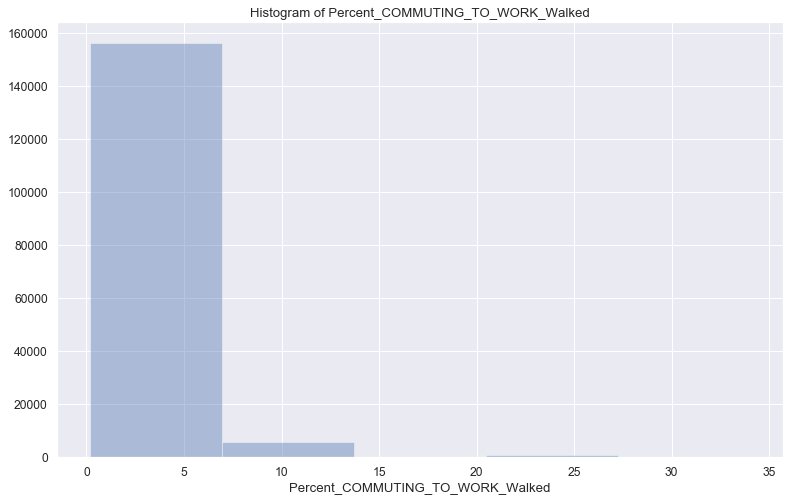

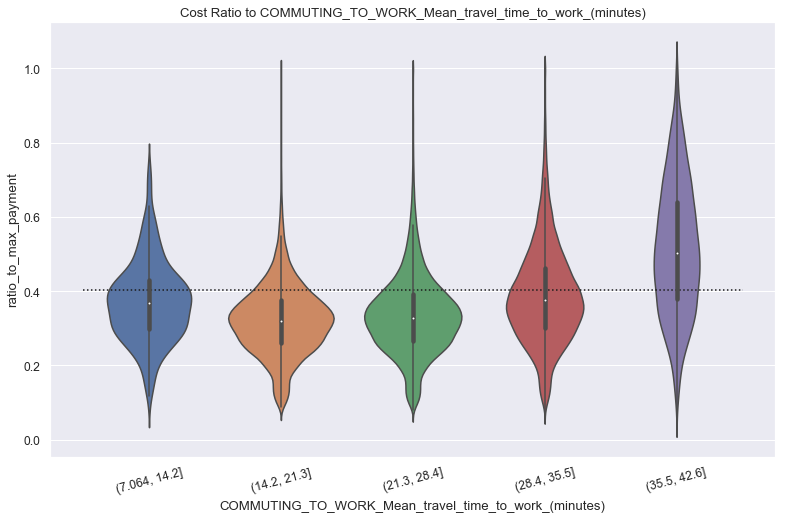

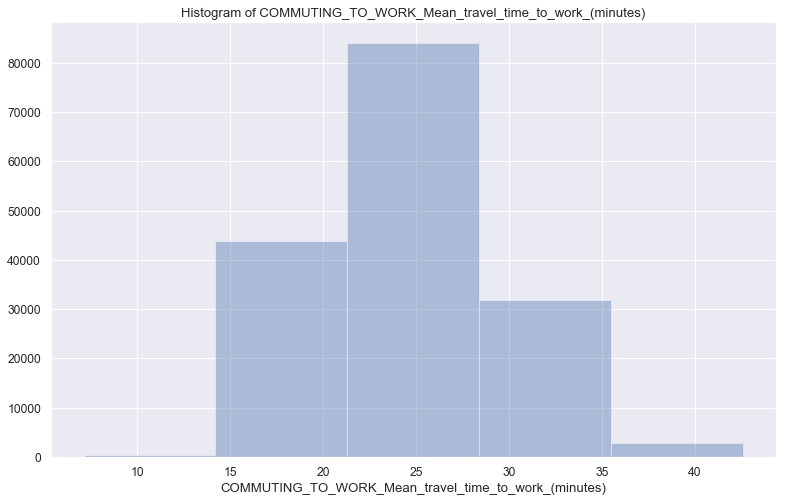

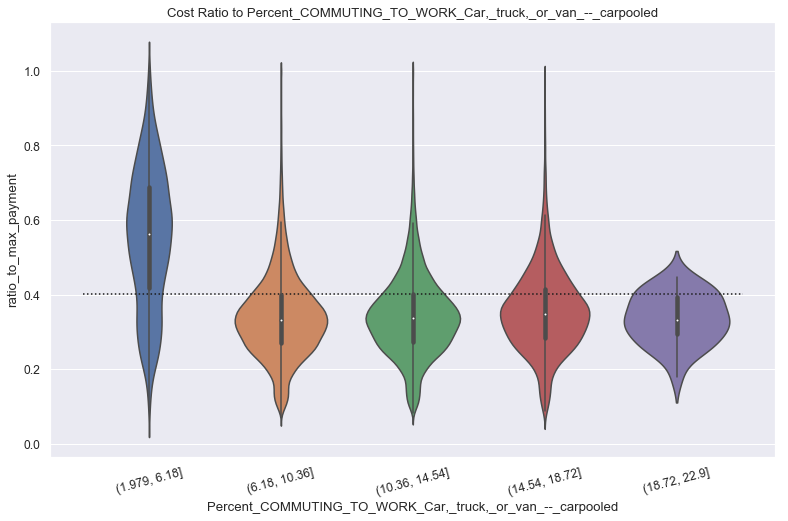

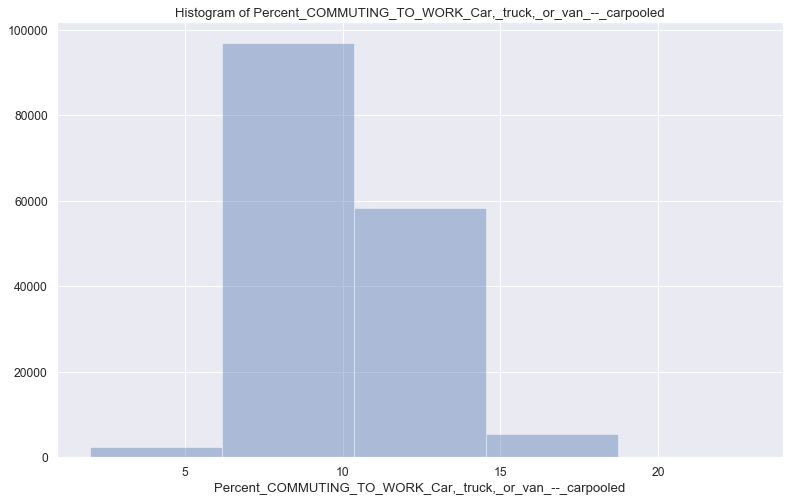

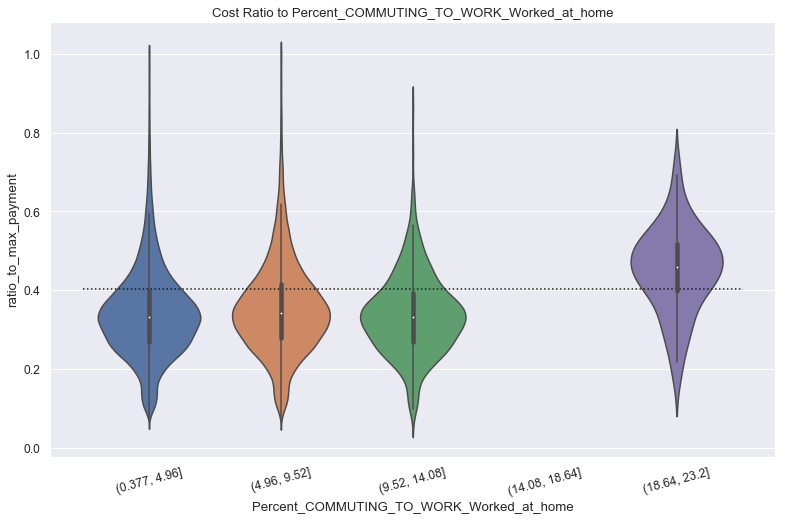

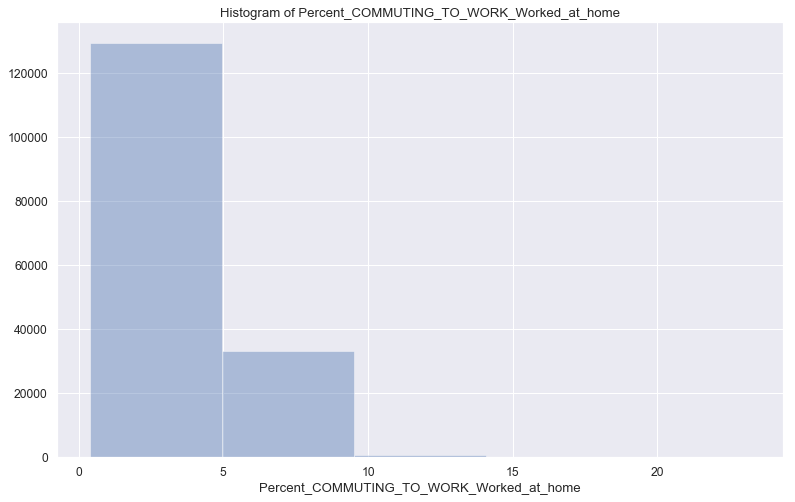

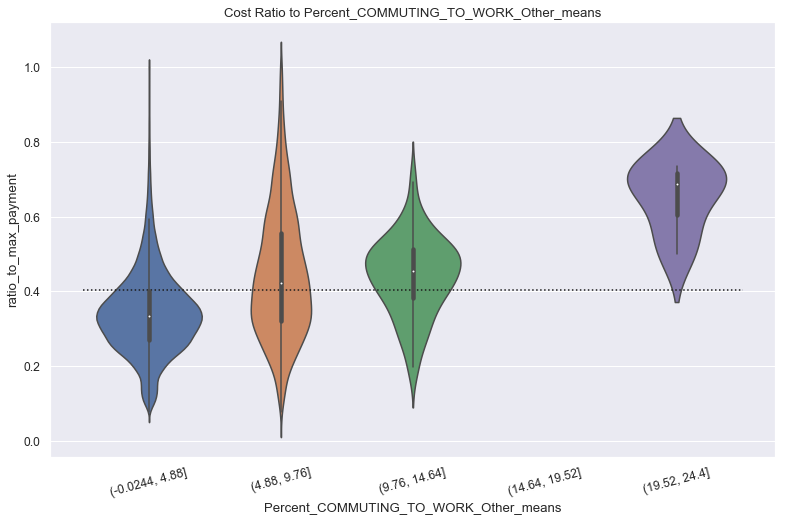

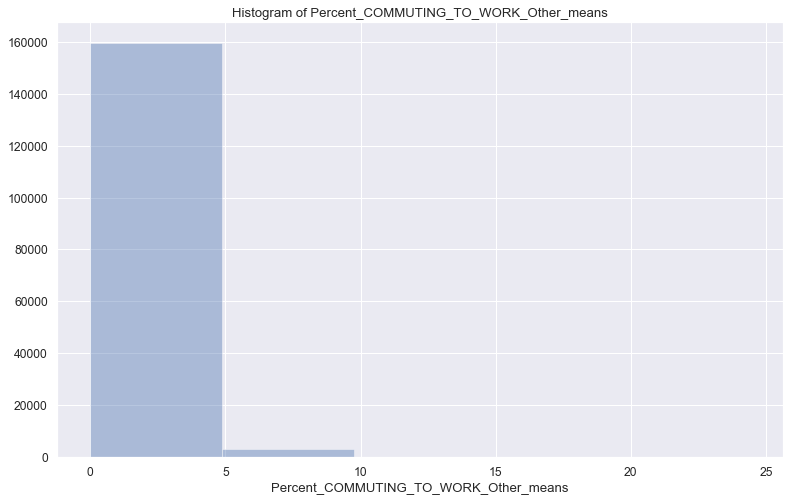

In [13]:
count = 0
for j in a.index:
    if 'COMMUTING' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
        sns.set(font_scale=1.1)
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        if count > 5:
            break
        count +=1

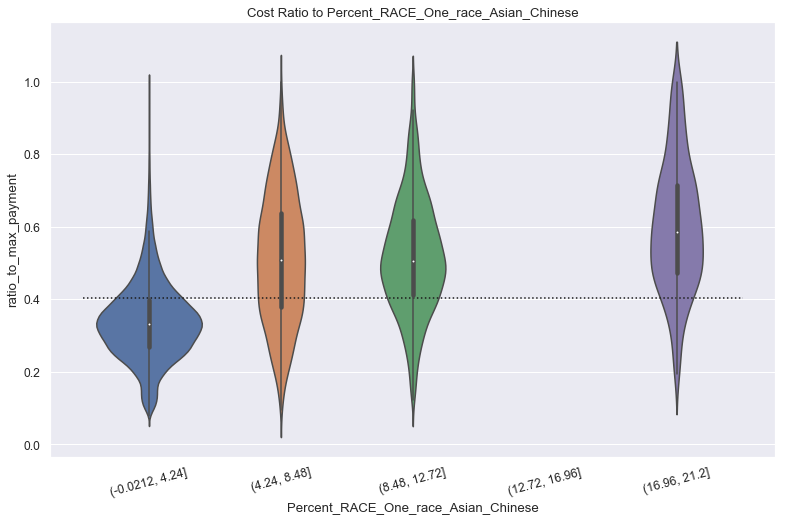

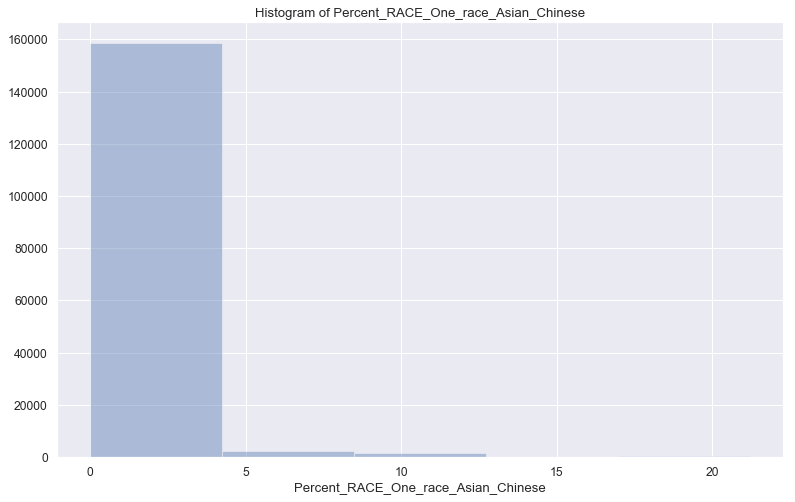

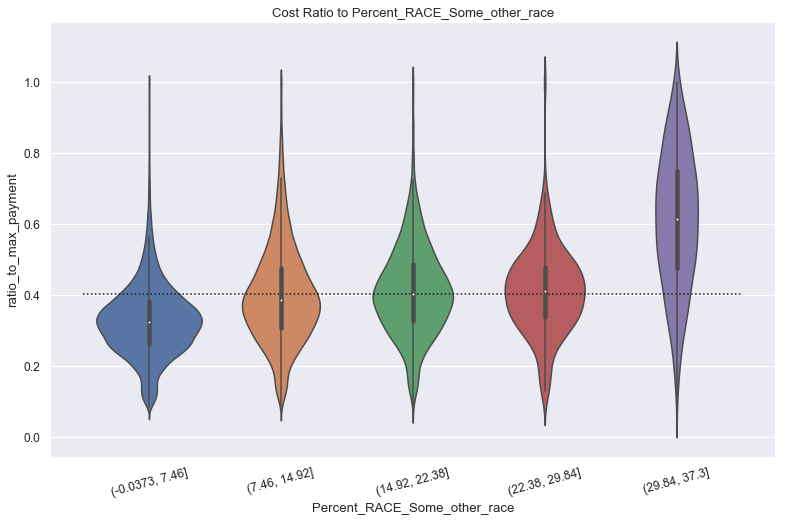

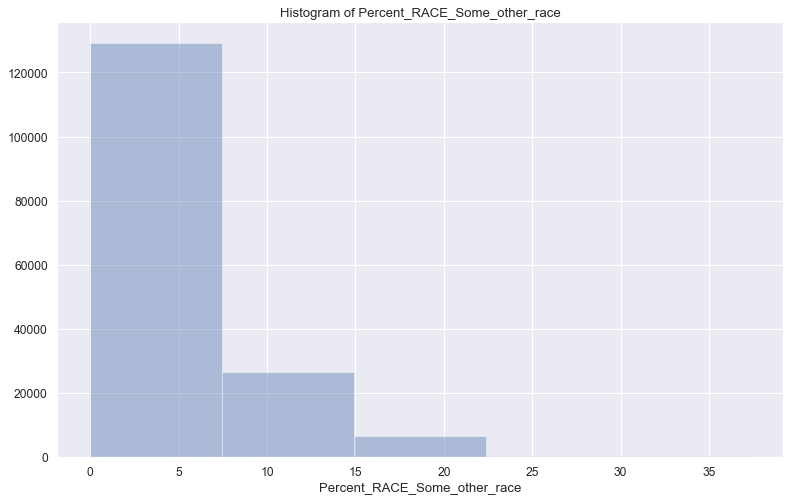

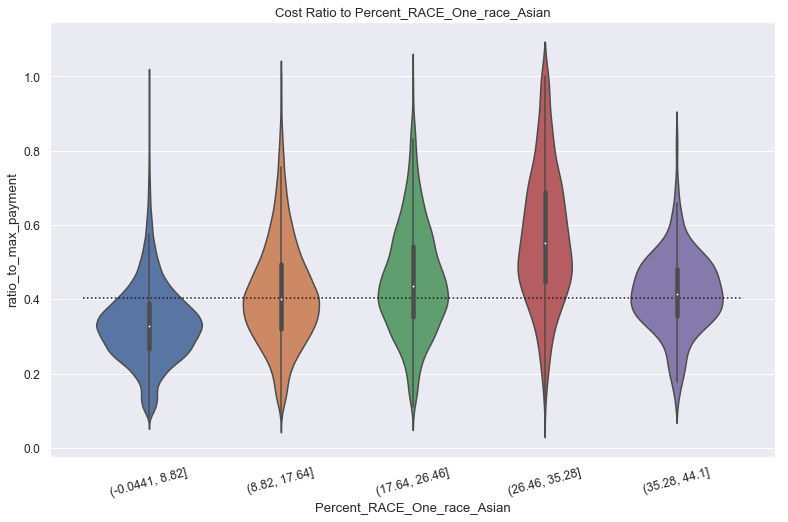

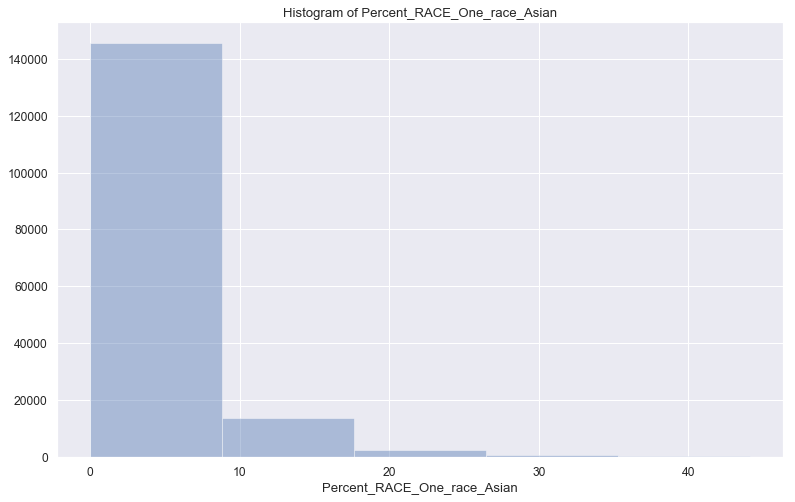

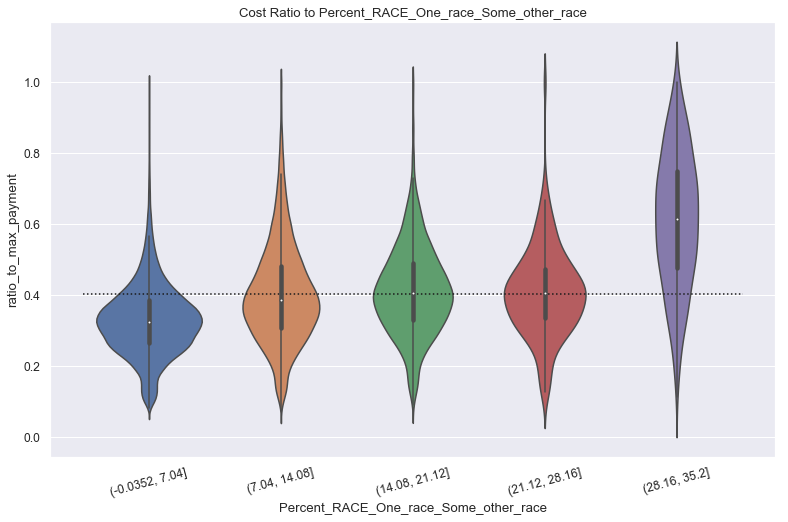

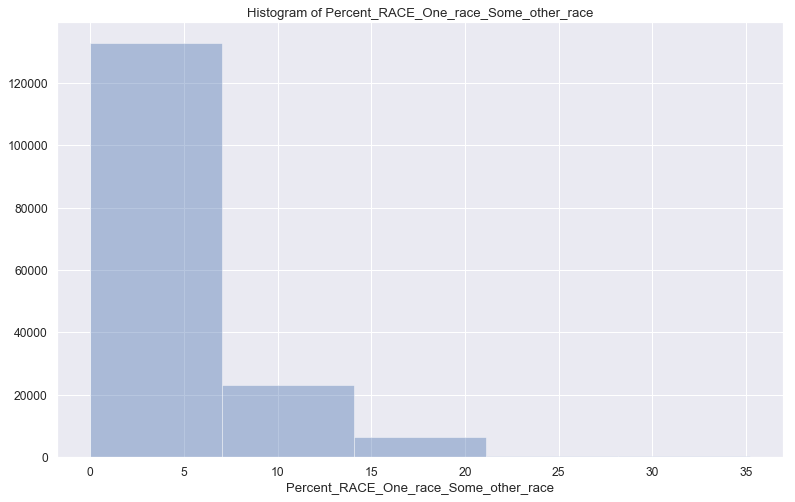

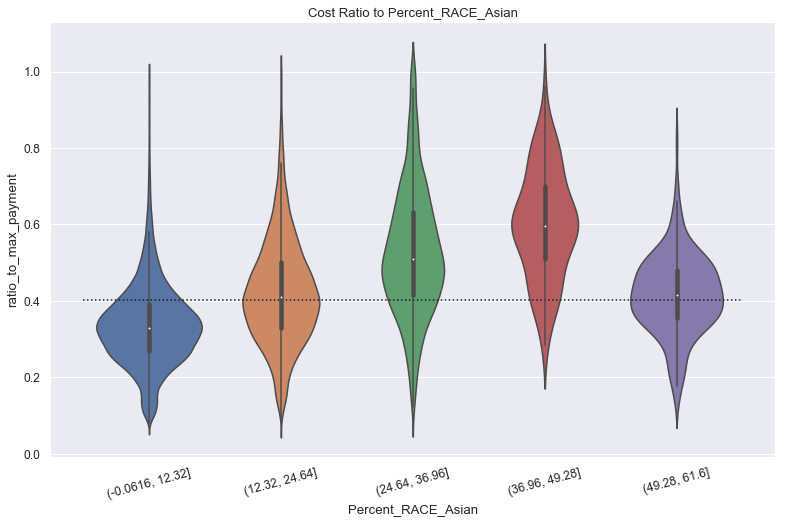

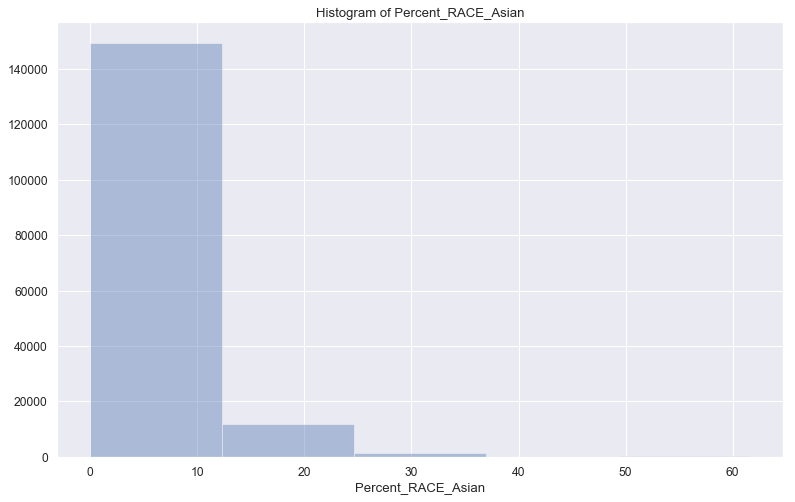

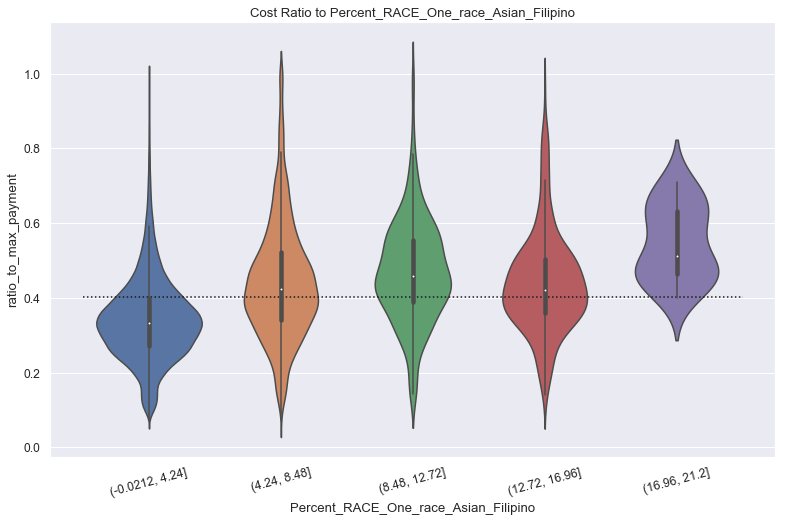

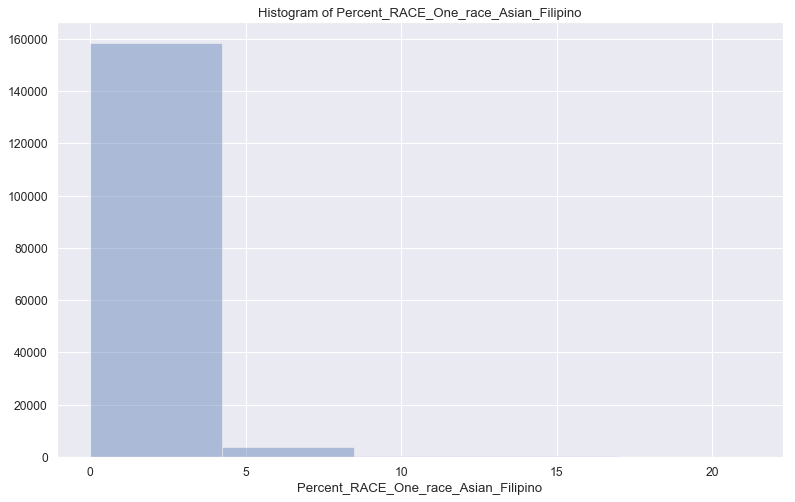

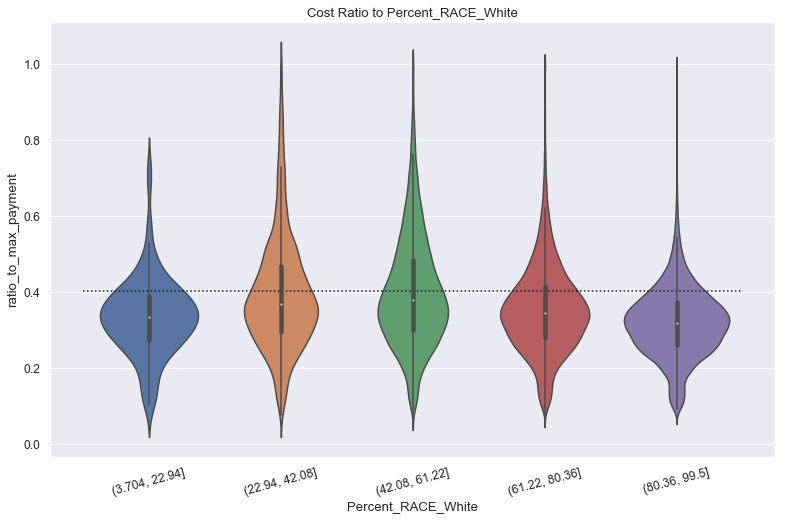

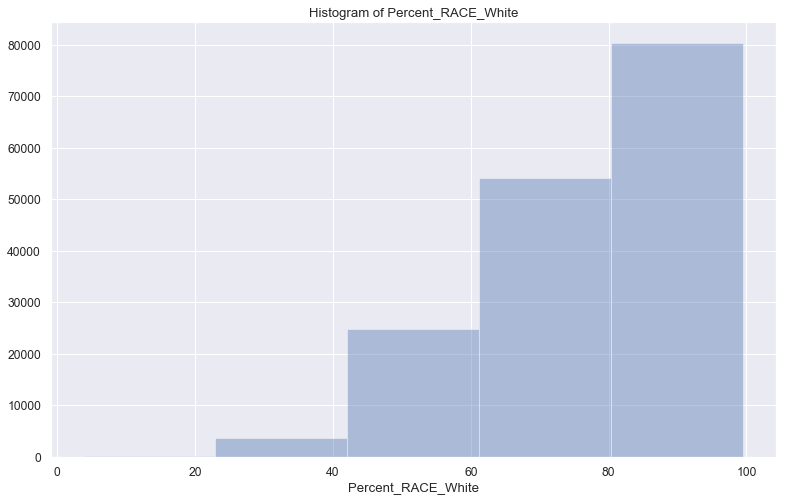

In [14]:
count = 0
for j in a.index:
    if 't_RACE_' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        if count > 5:
            break
        count +=1

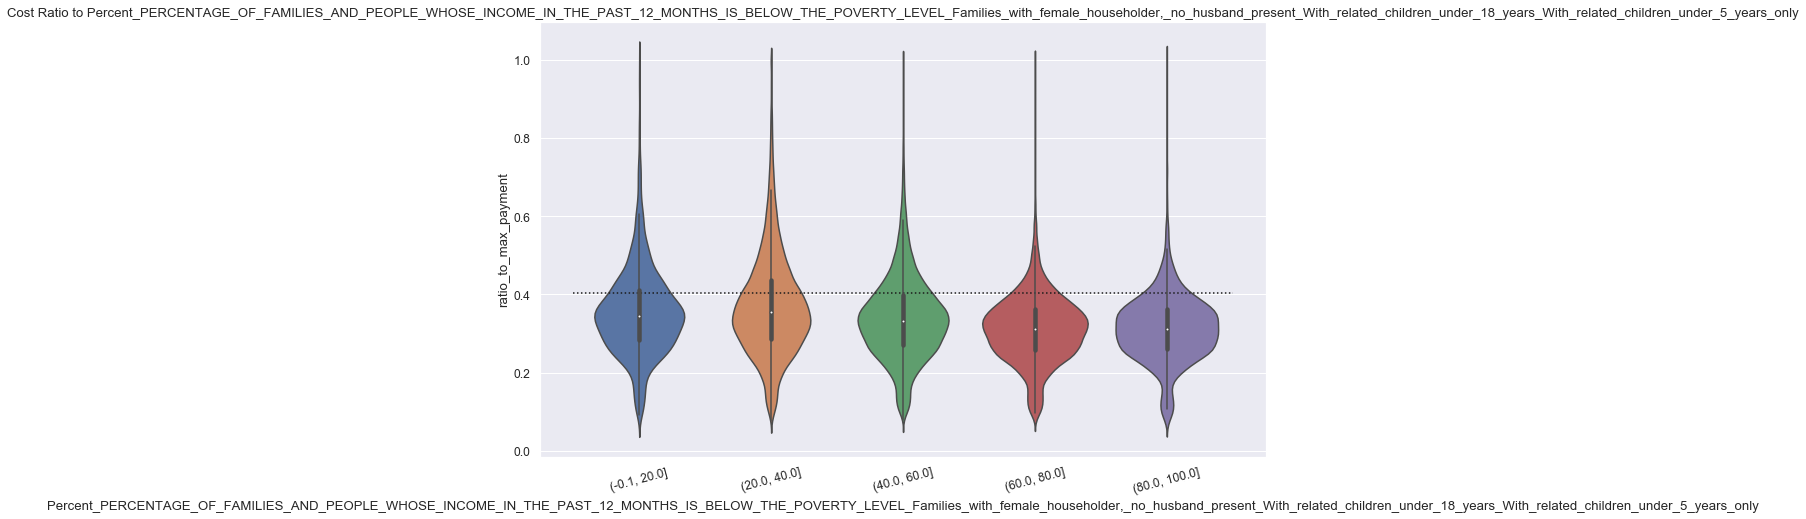

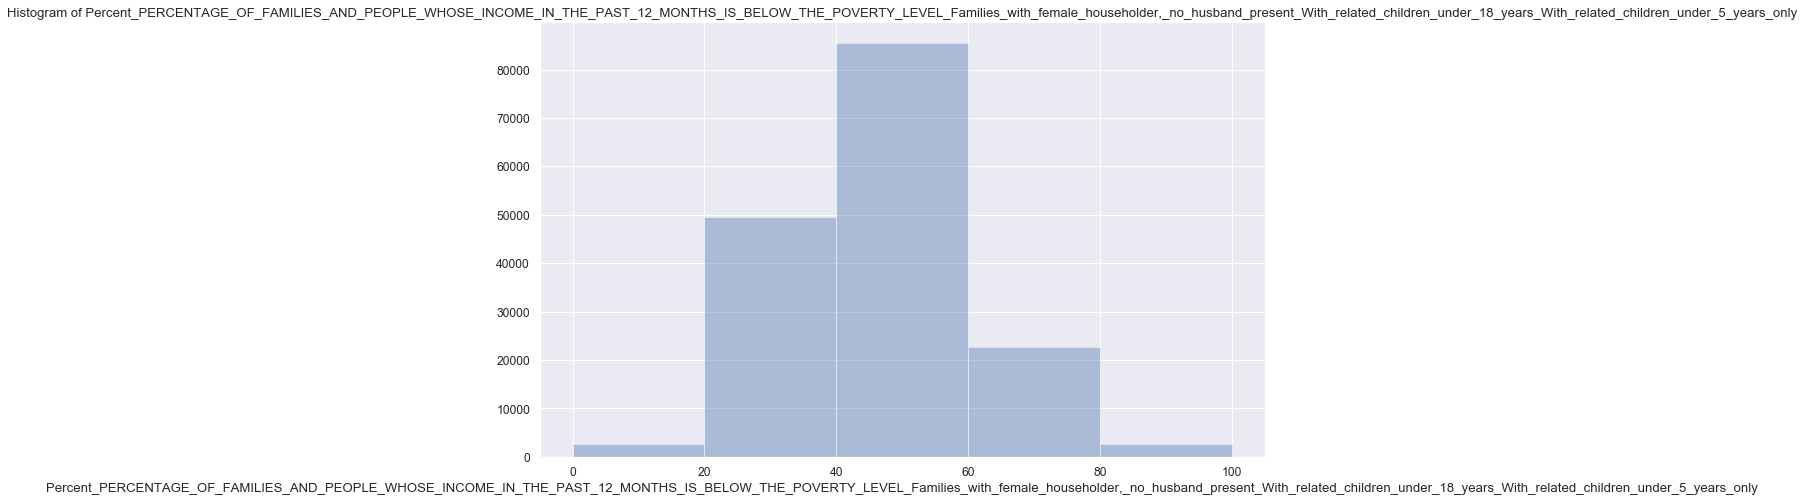

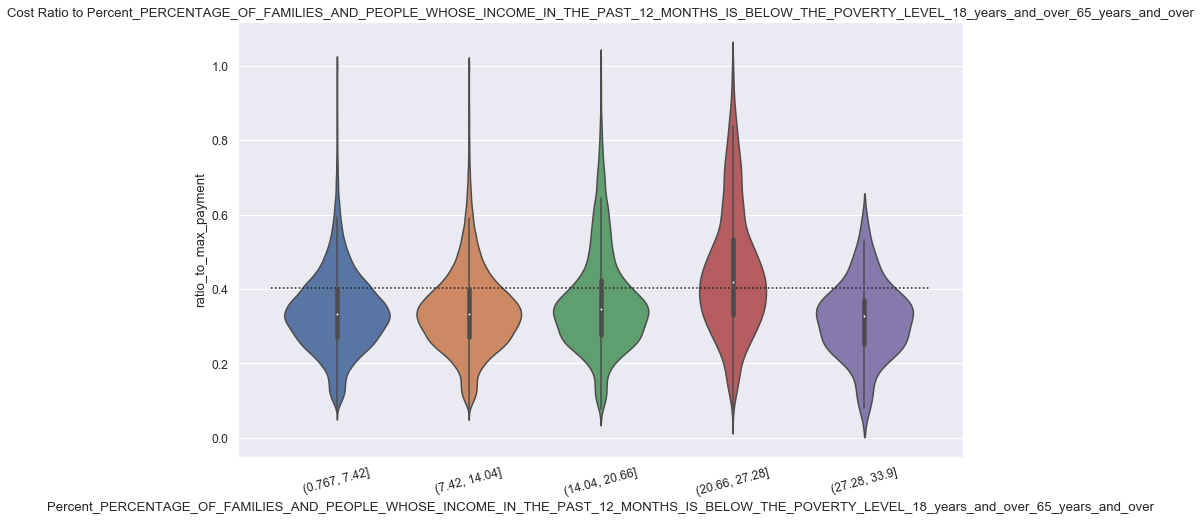

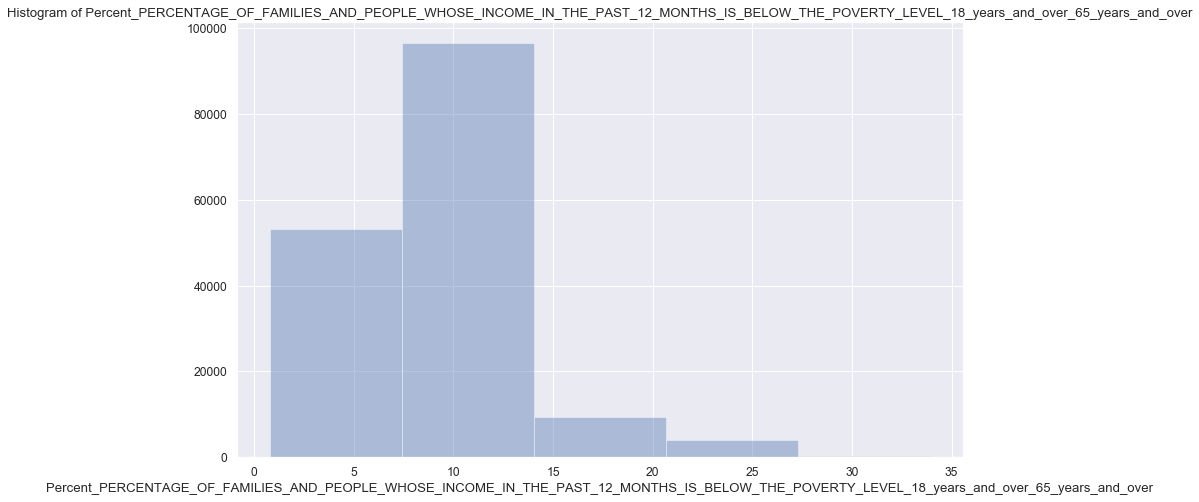

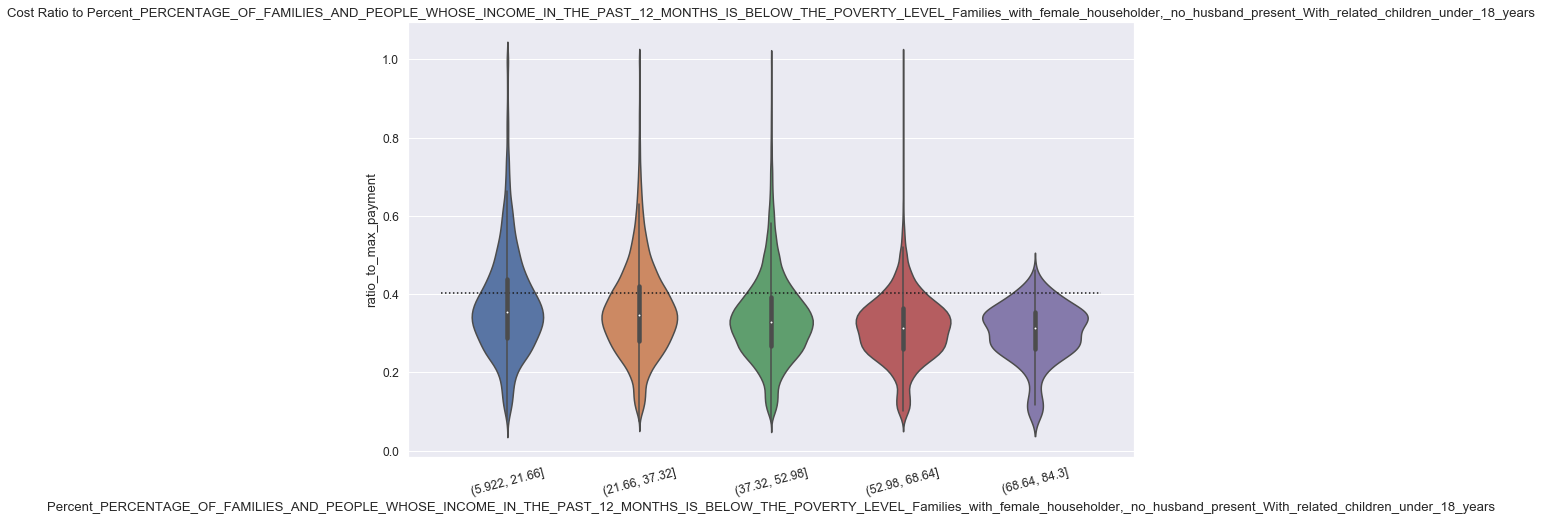

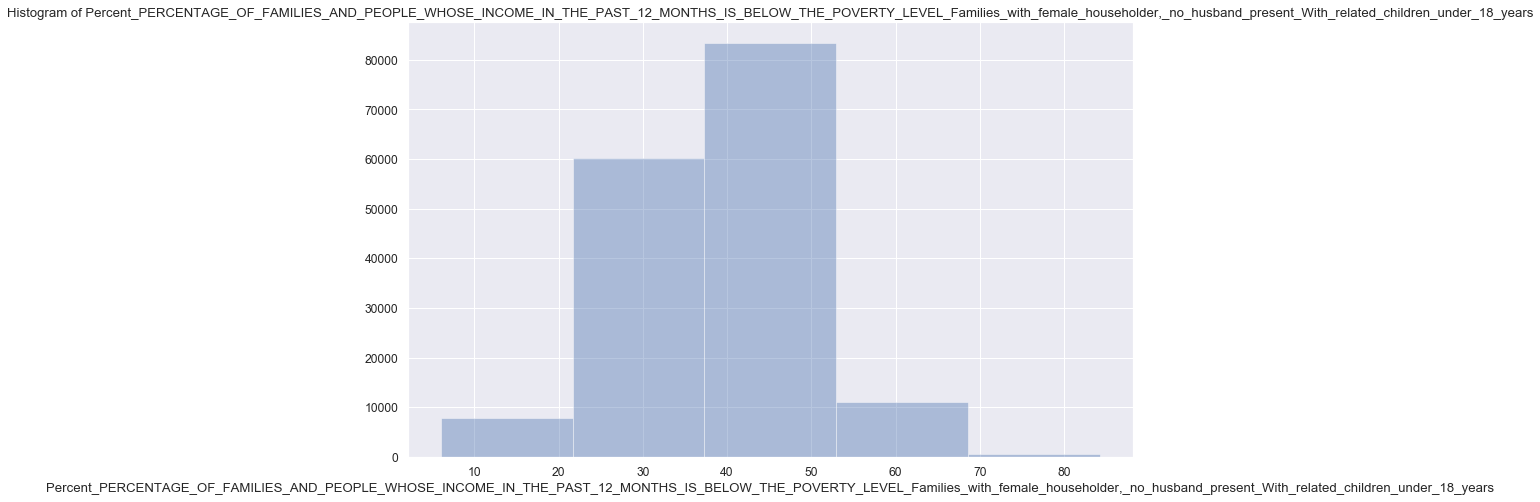

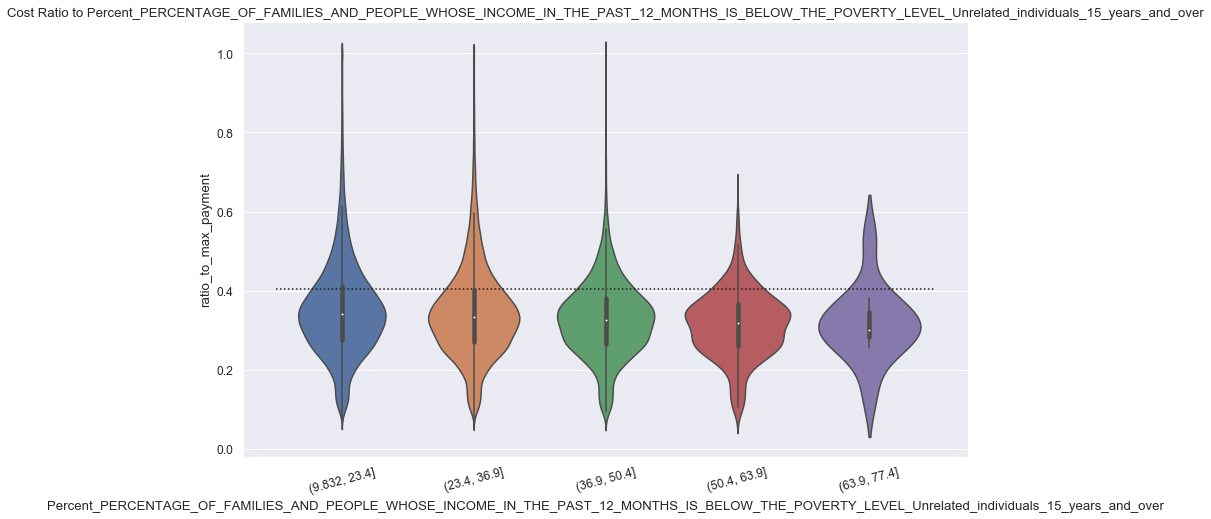

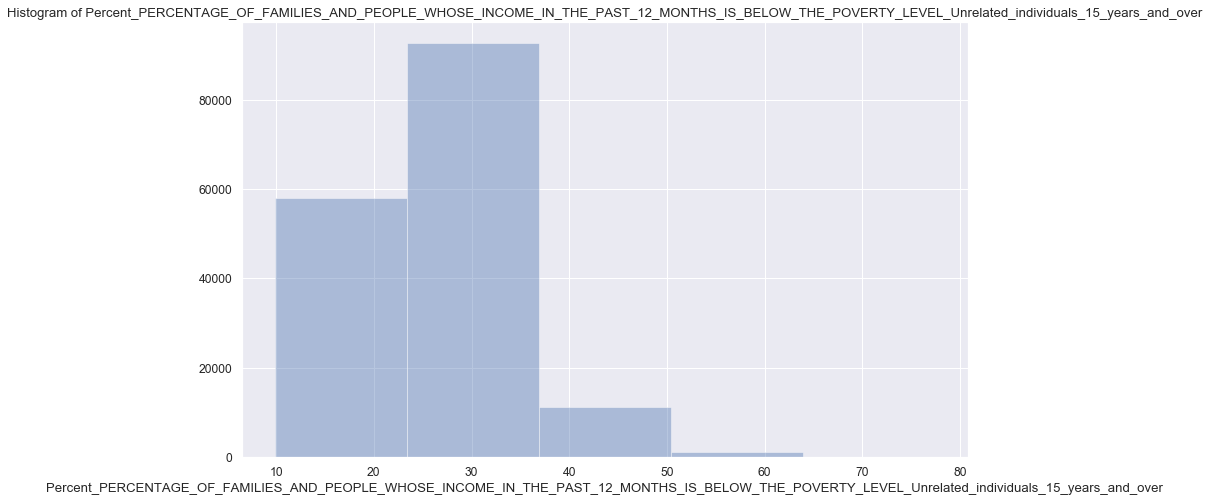

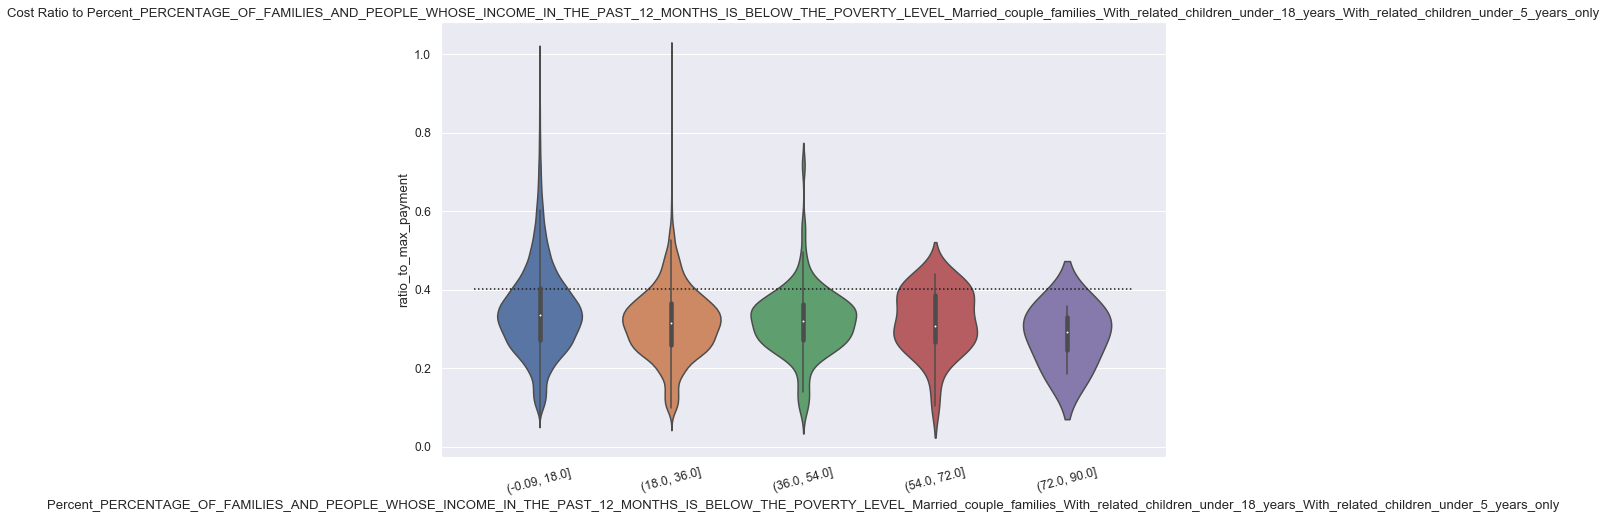

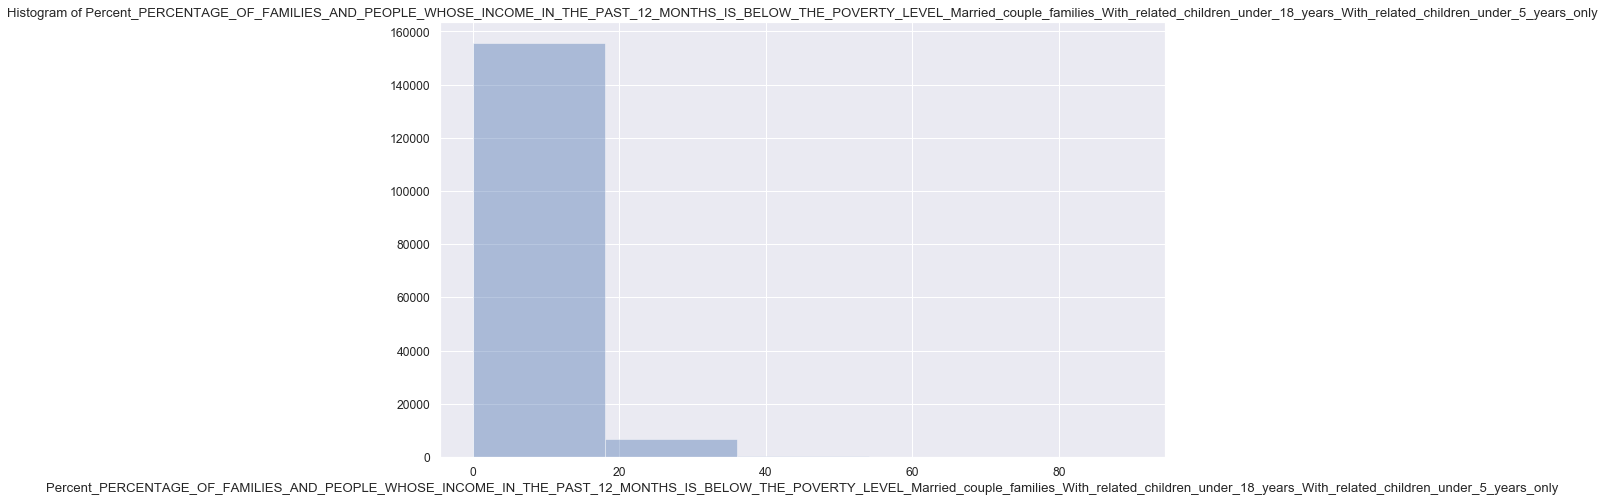

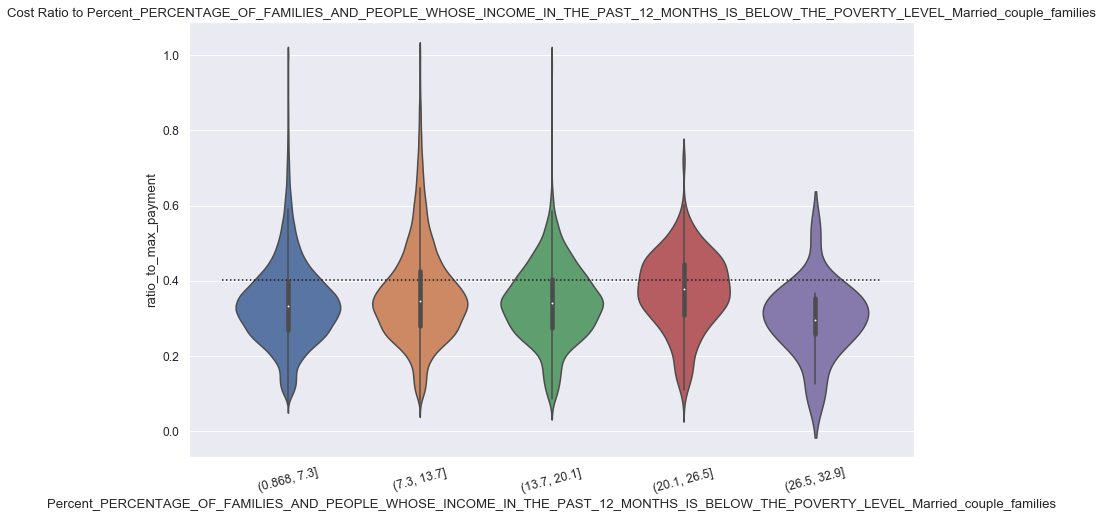

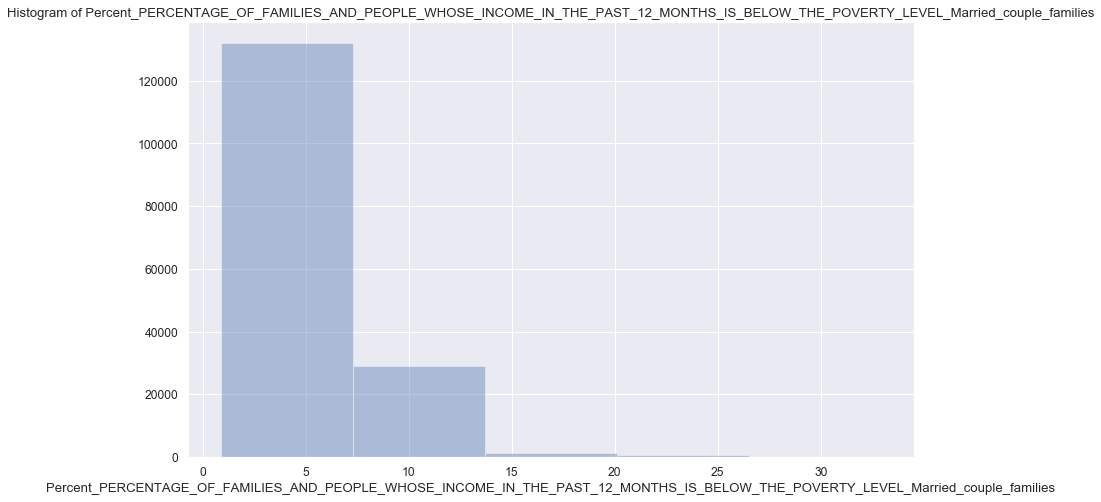

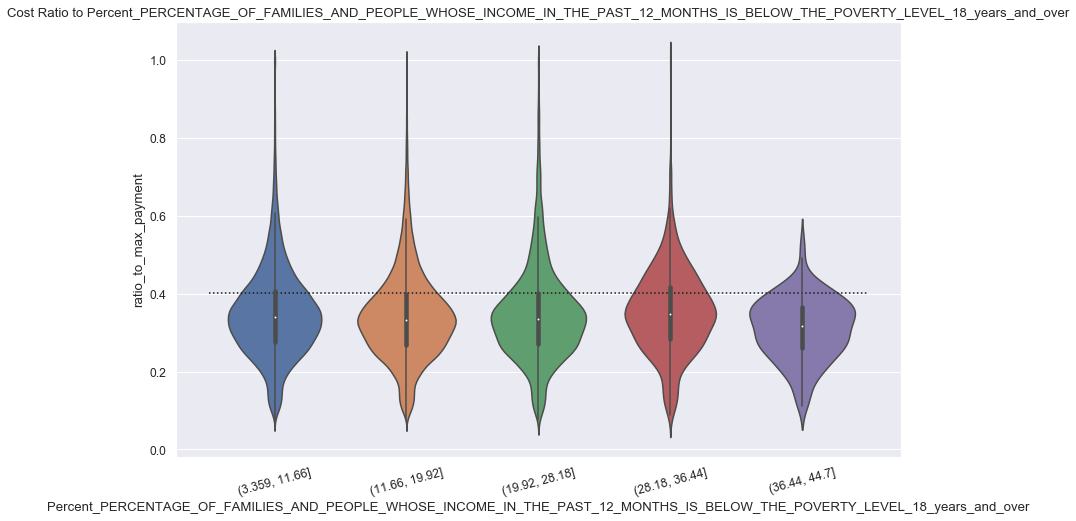

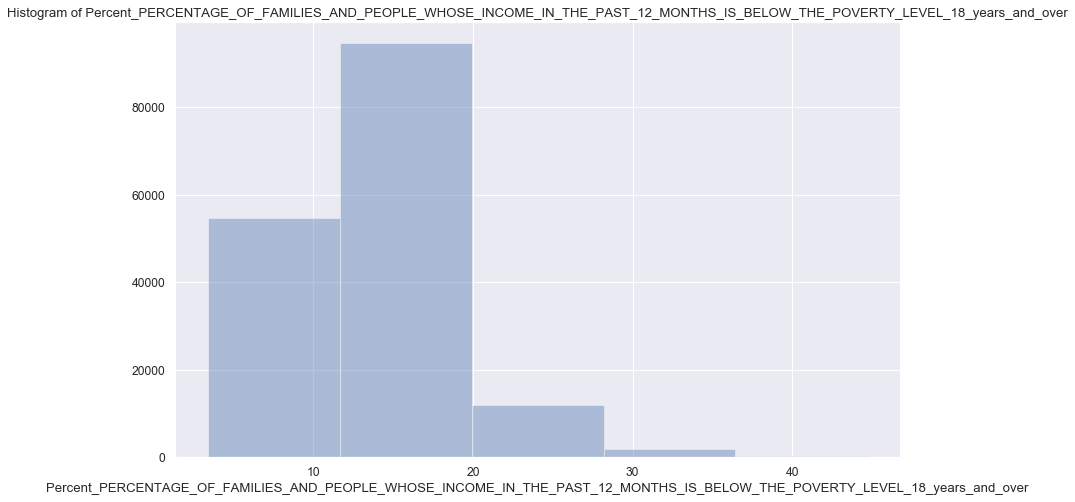

In [15]:
count = 0
for j in a.index:
    if 'POVERTY' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        if count > 5:
            break
        count +=1

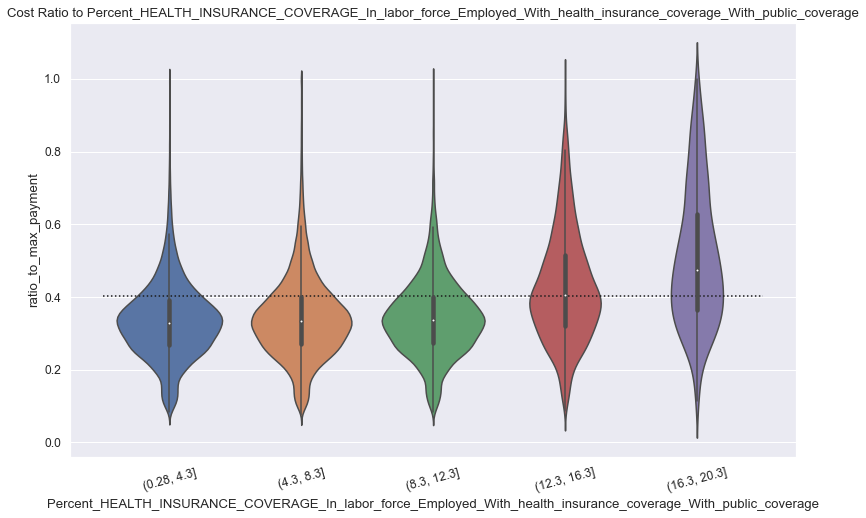

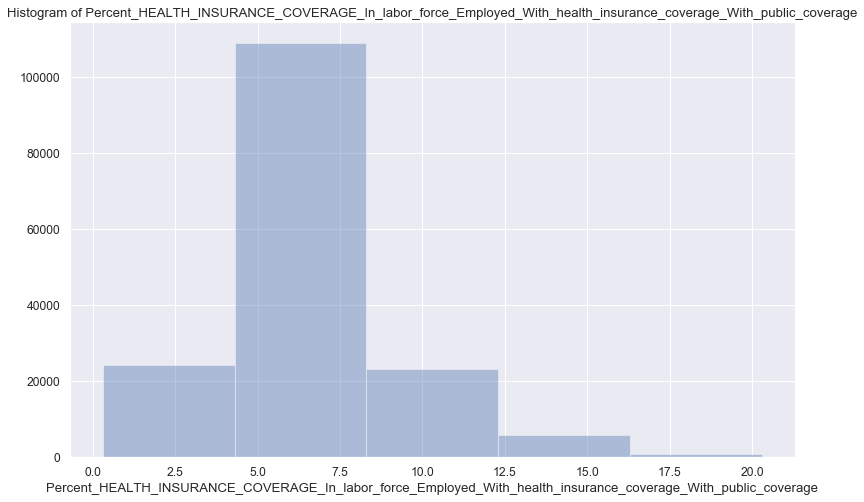

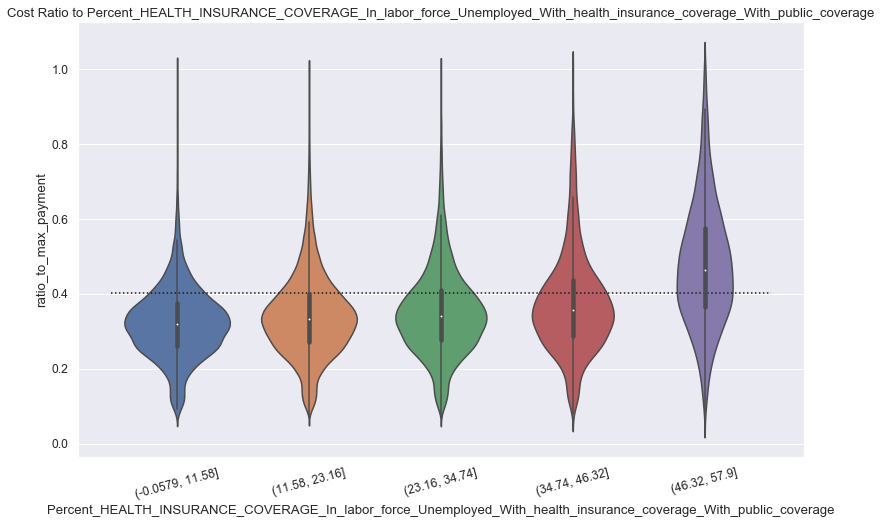

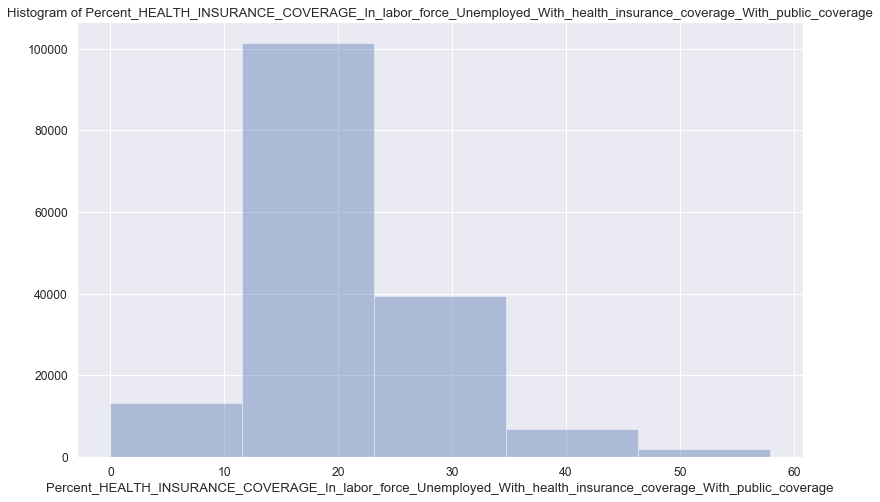

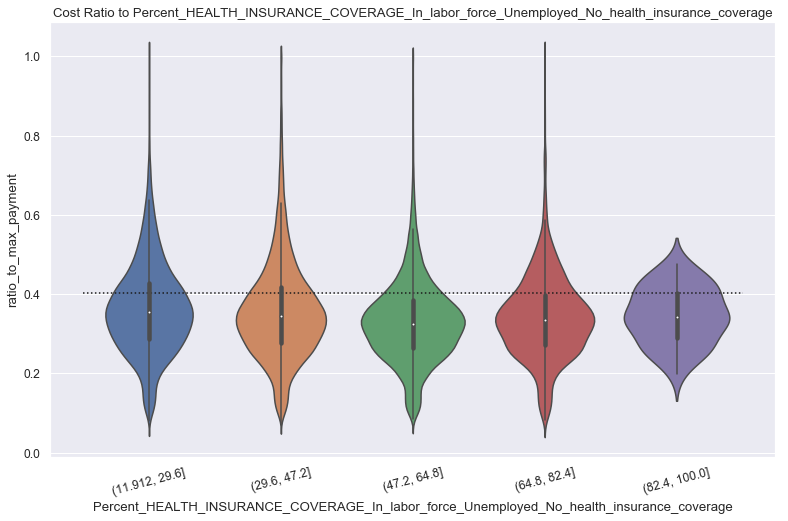

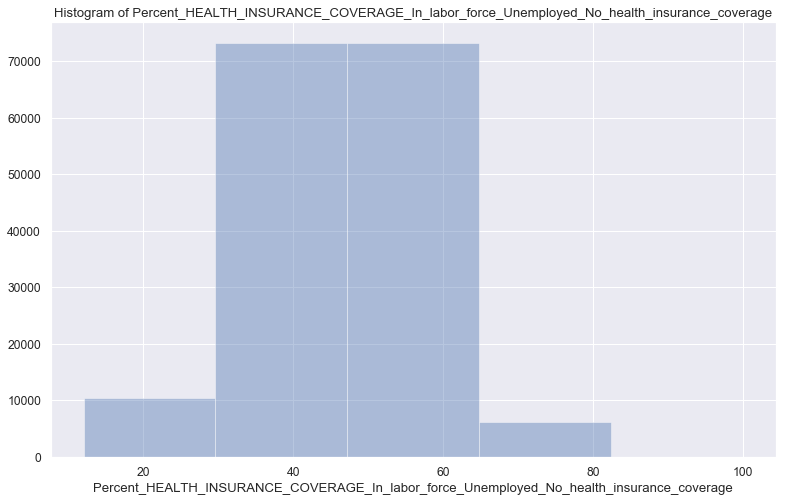

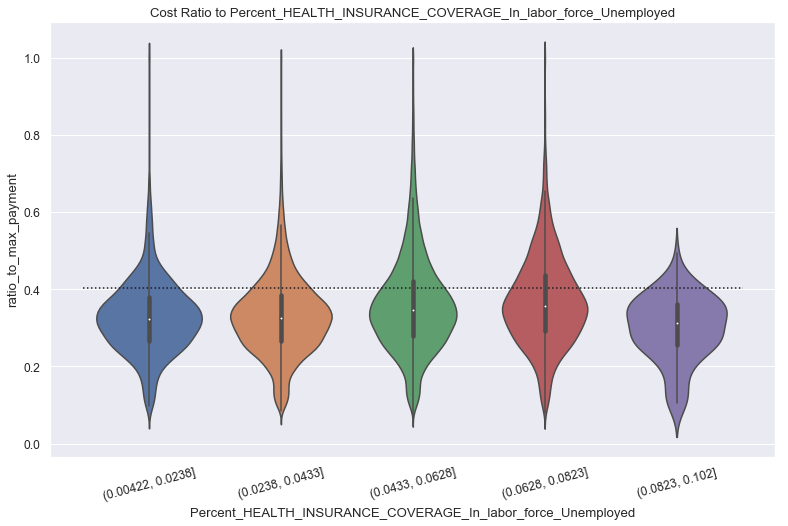

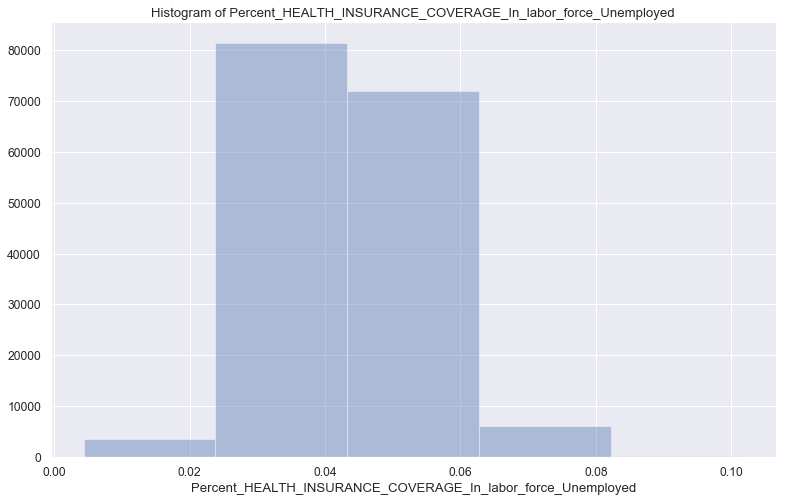

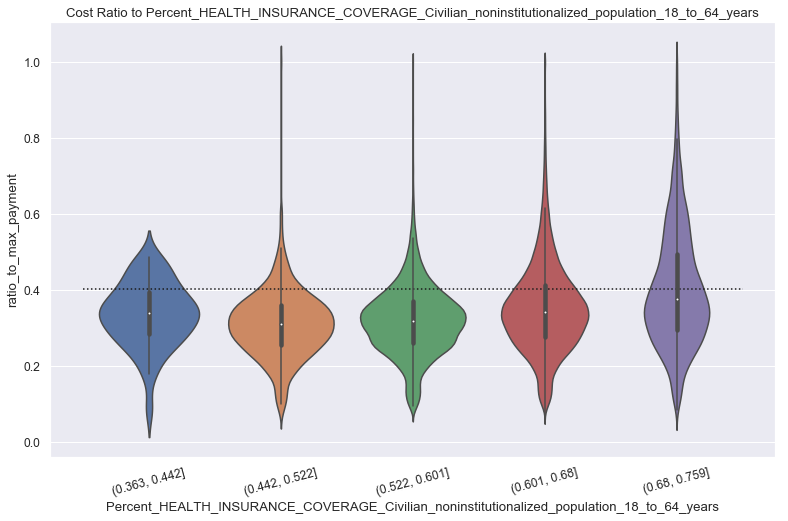

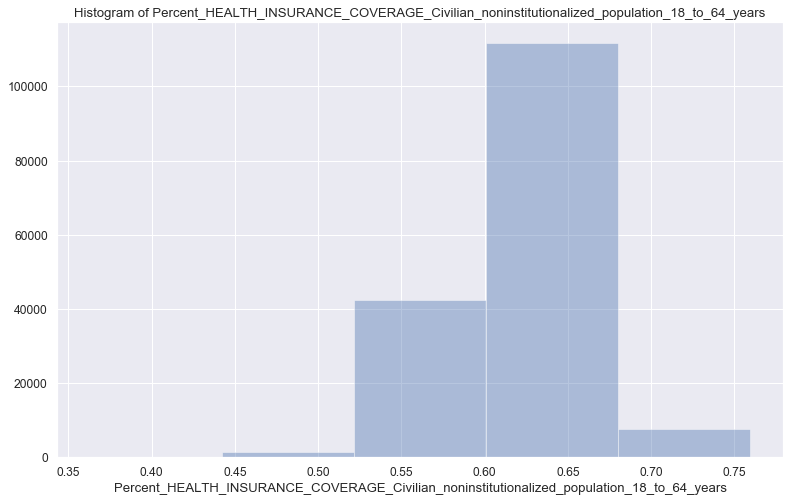

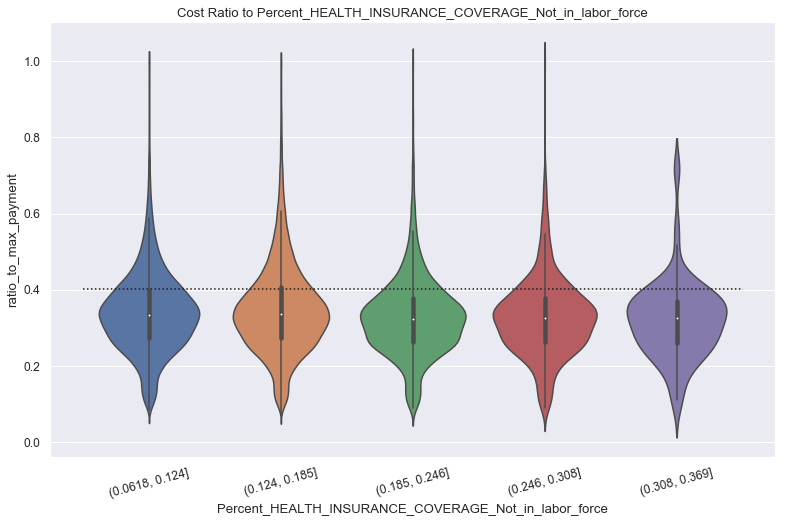

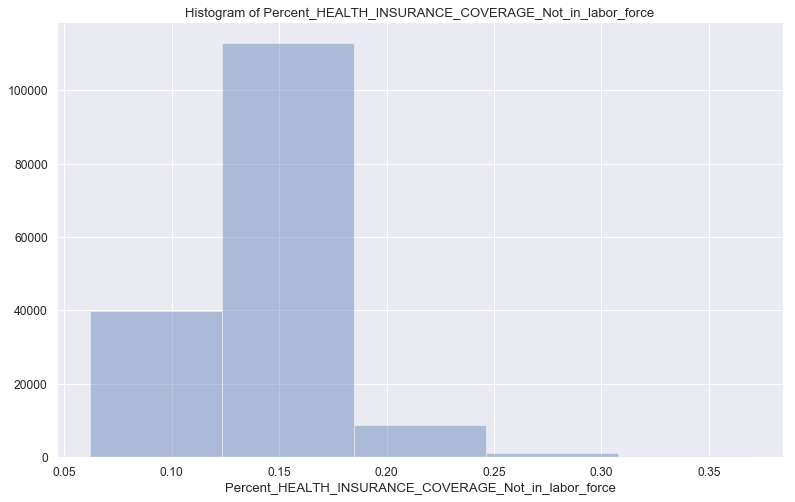

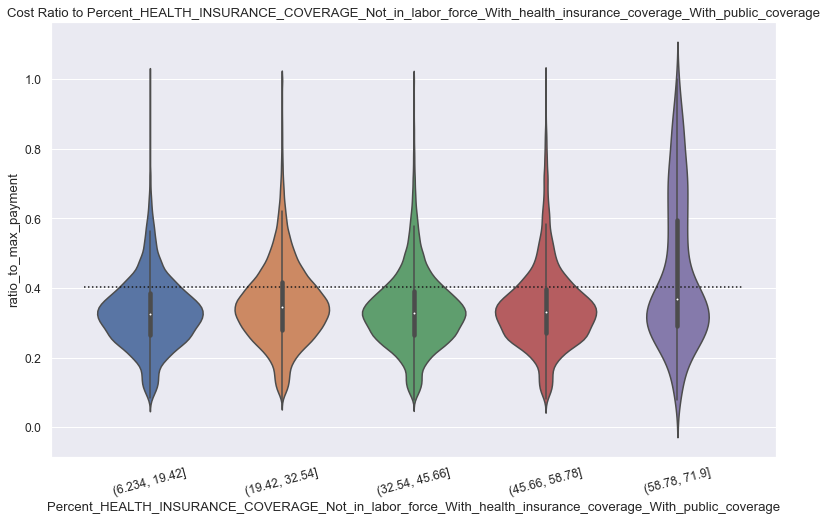

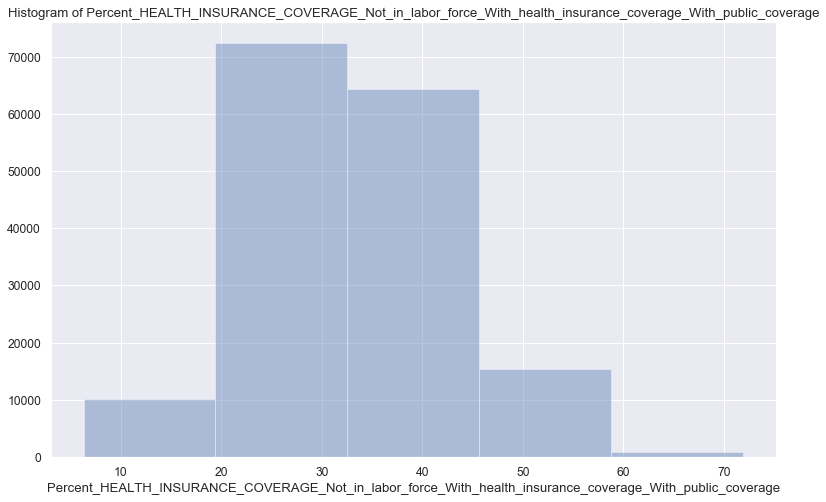

In [16]:

count = 0
for j in a.index:
    if 'HEALTH_INSURANCE_COVERAGE' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        if count > 5:
            break
        count +=1

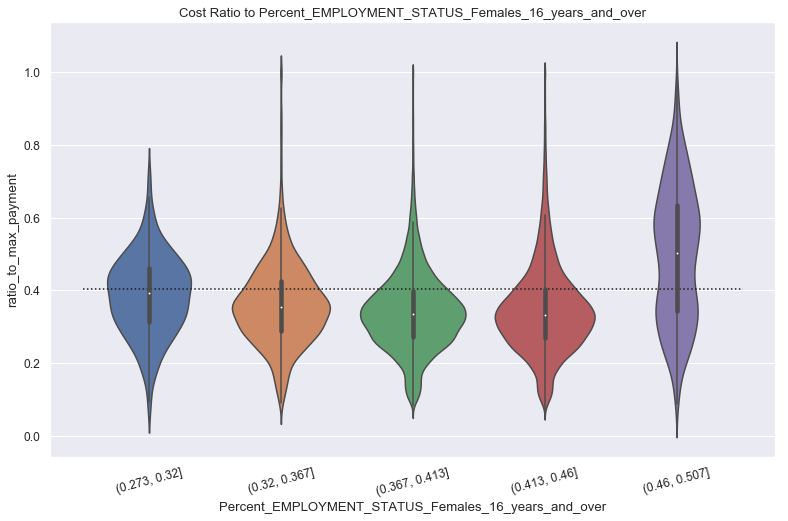

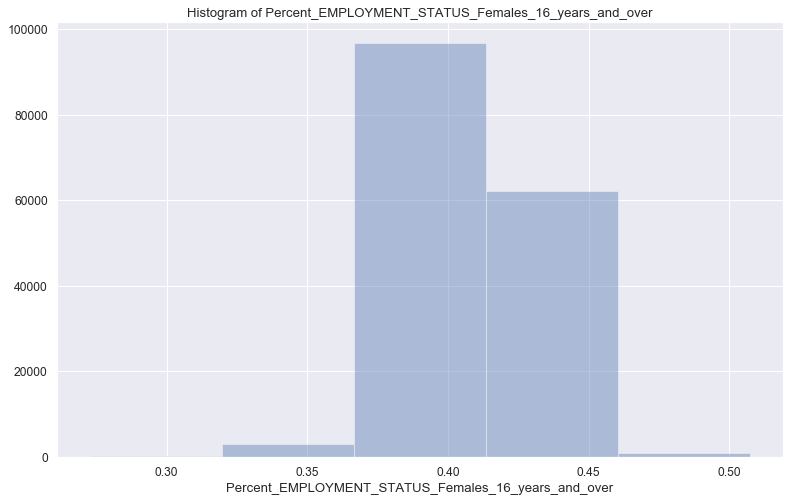

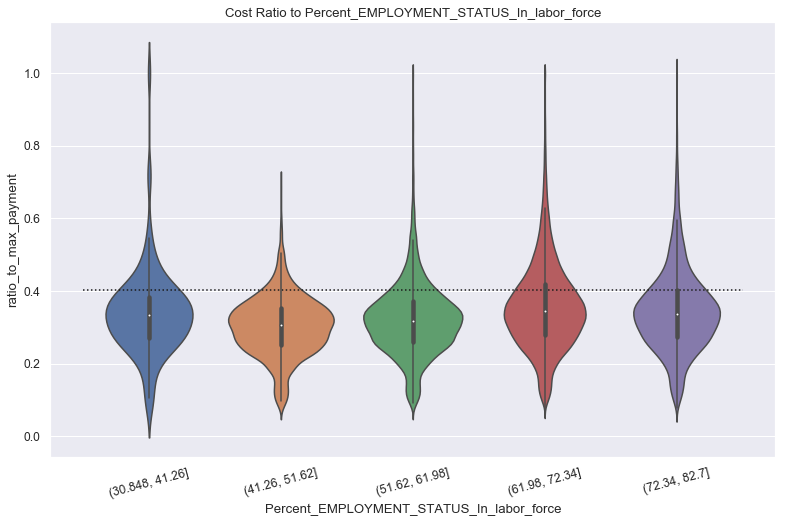

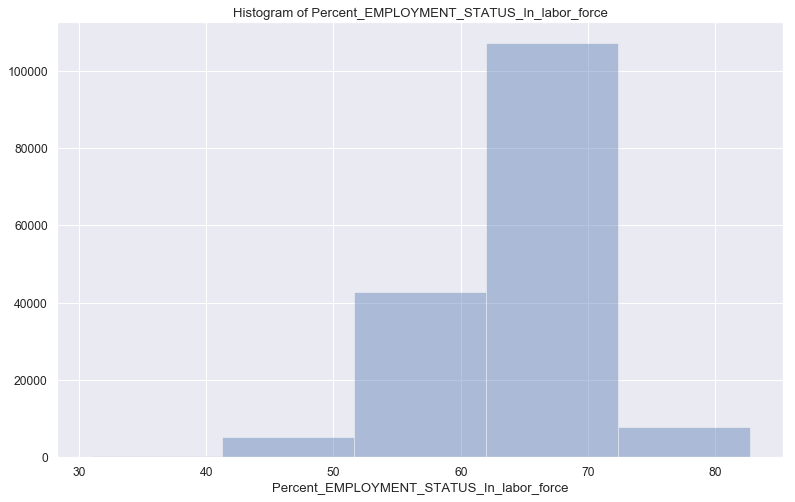

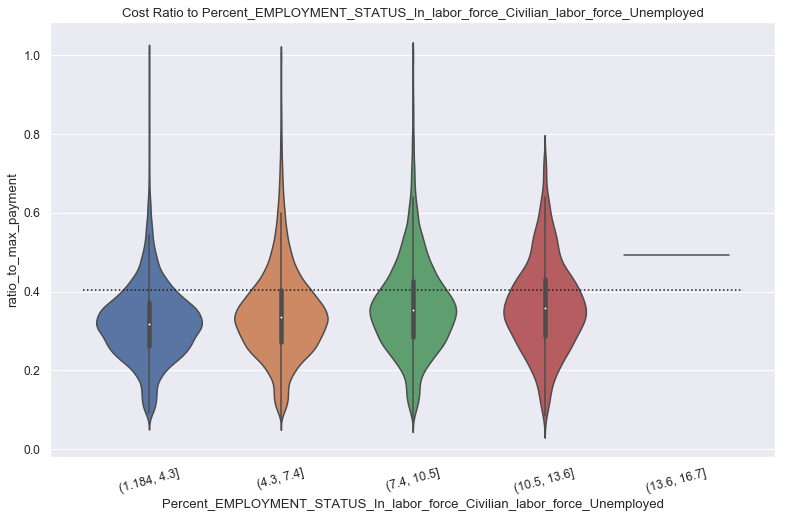

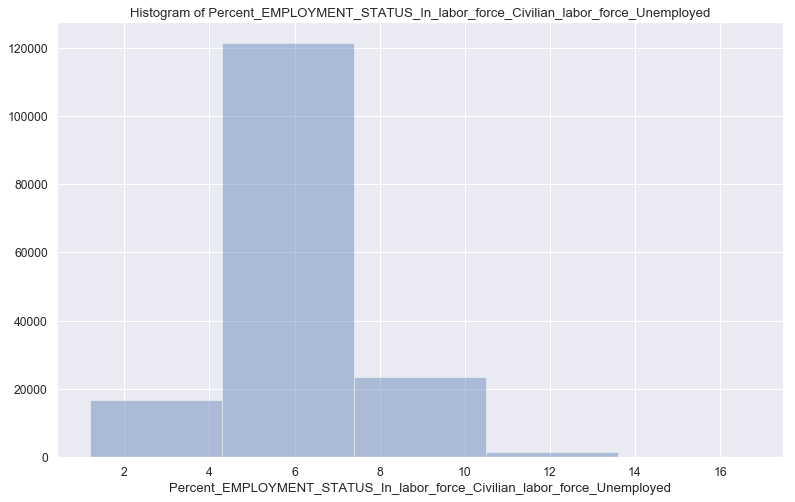

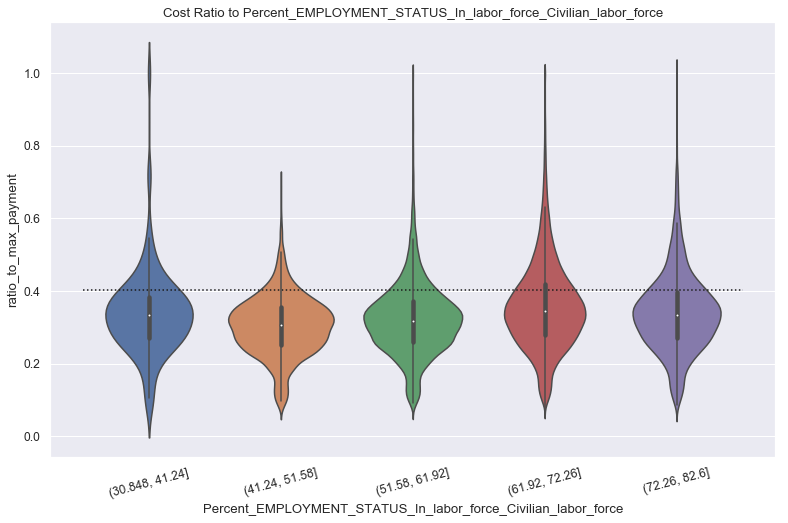

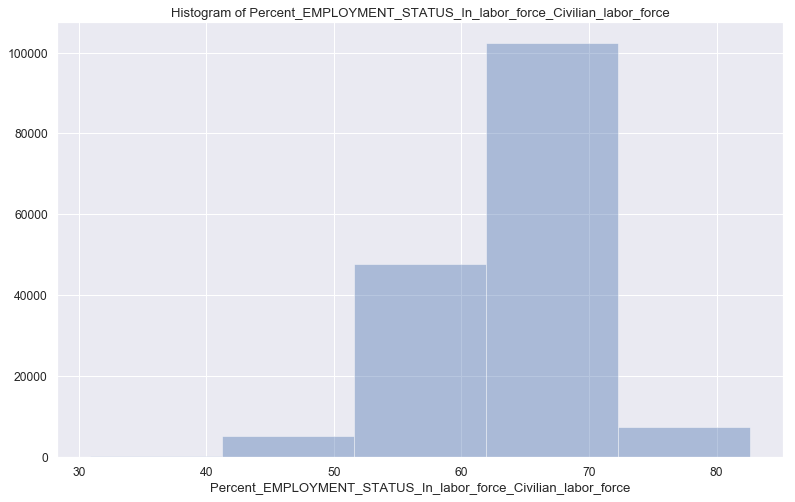

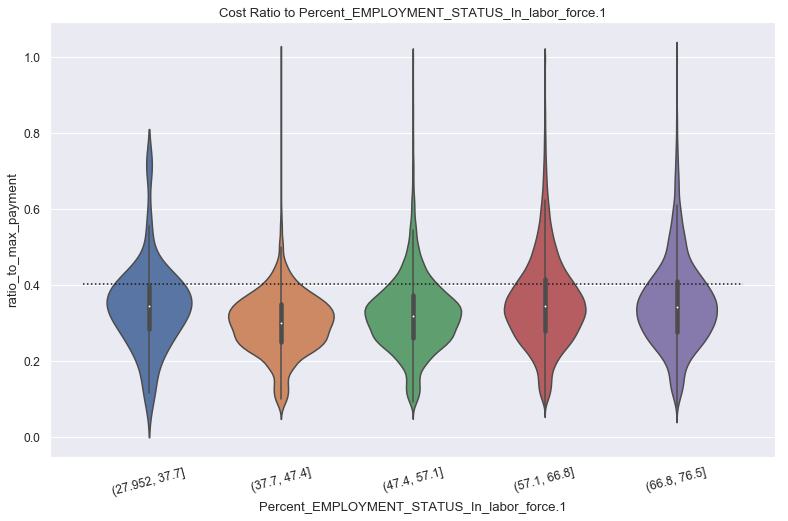

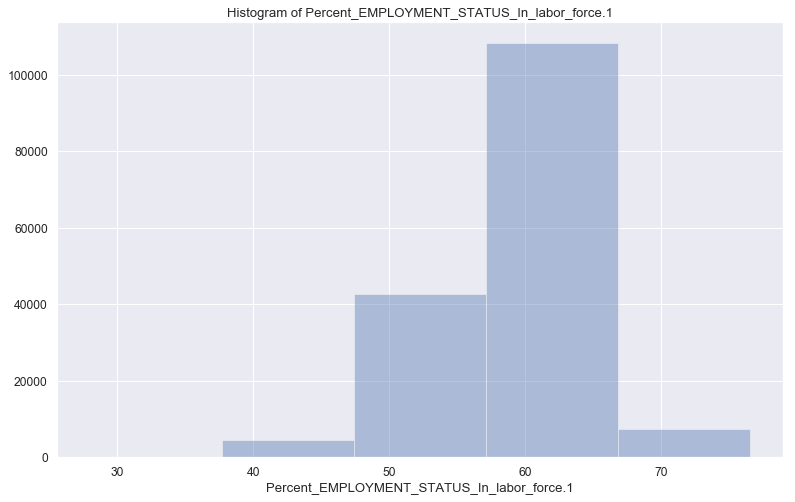

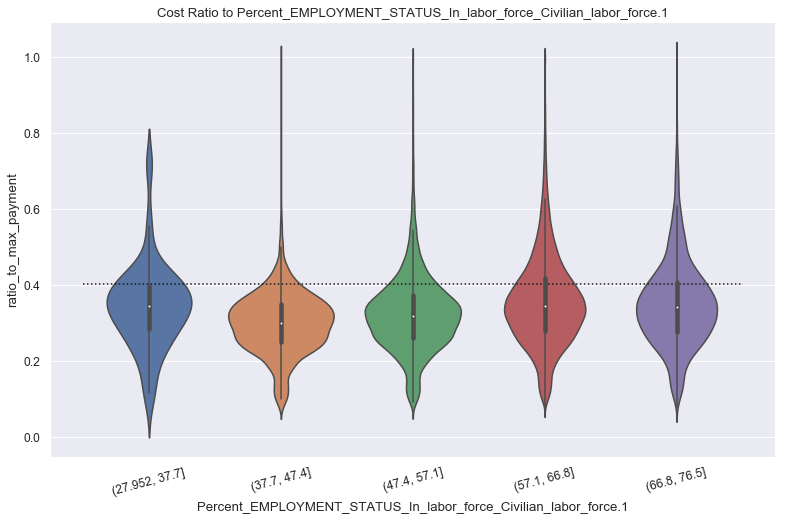

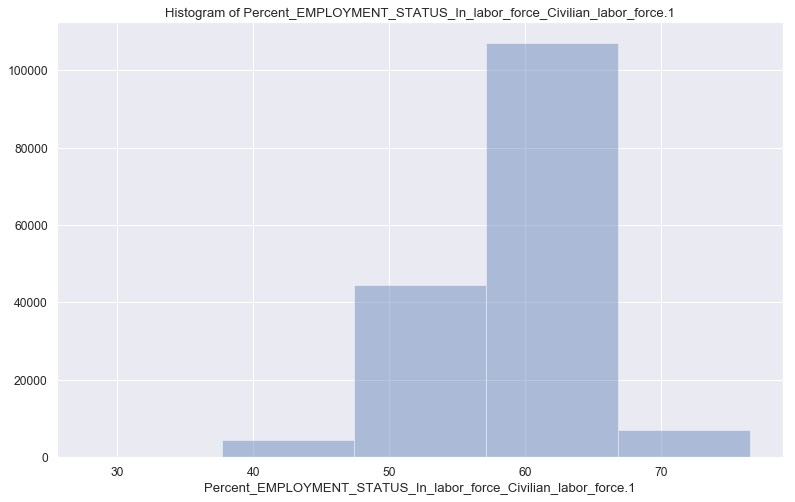

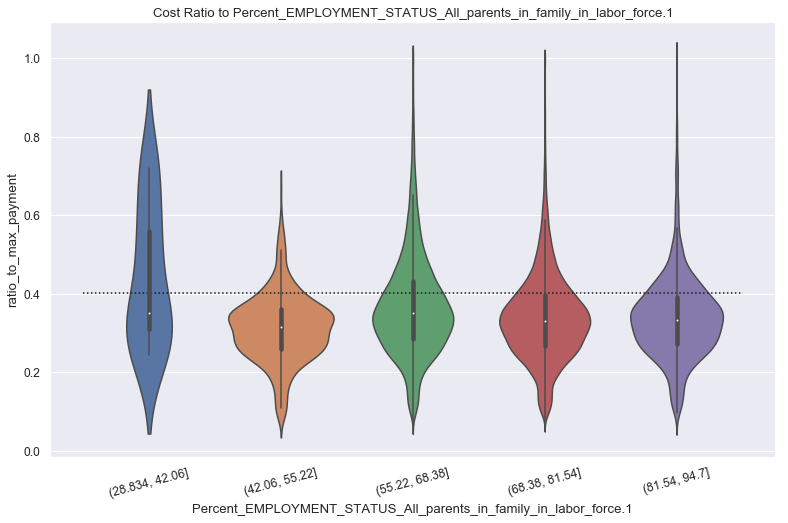

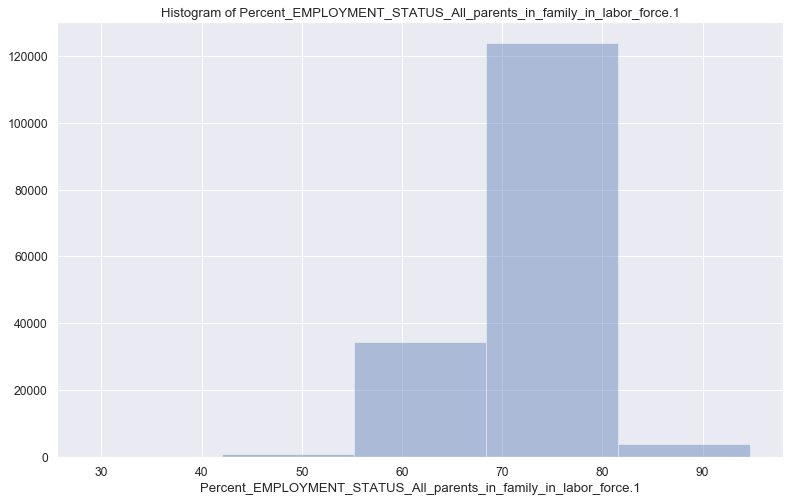

In [17]:
count = 0
for j in a.index:
    if 'EMPLOYMENT_STATUS' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        if count > 5:
            break
        count +=1

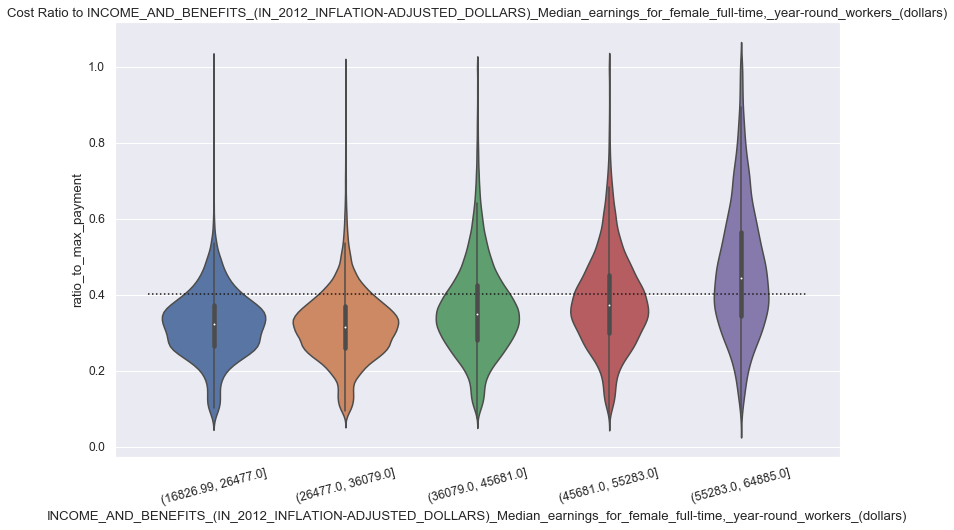

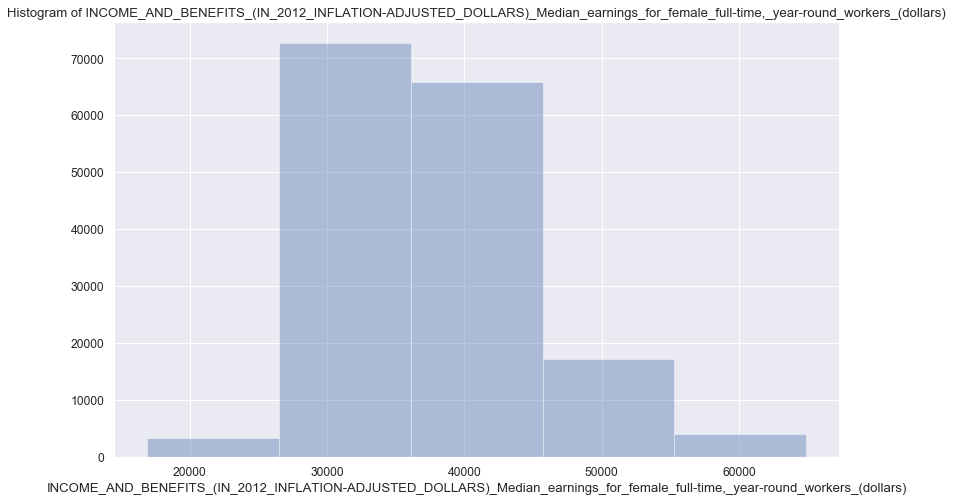

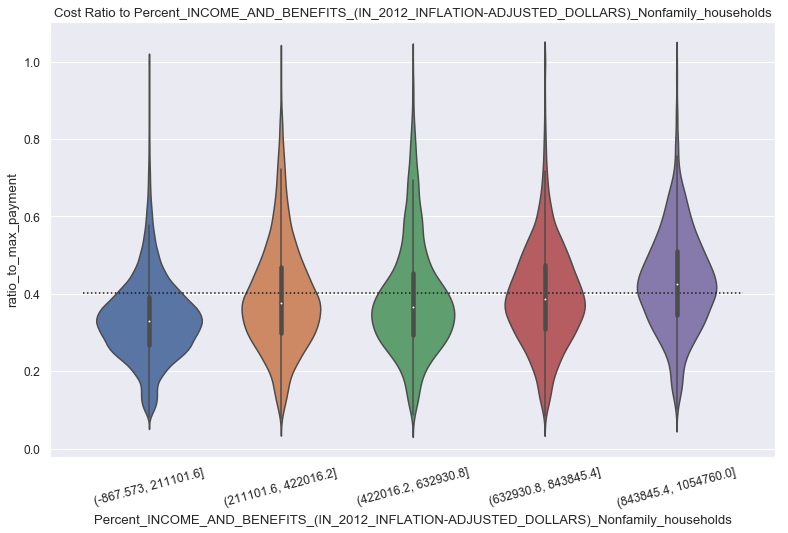

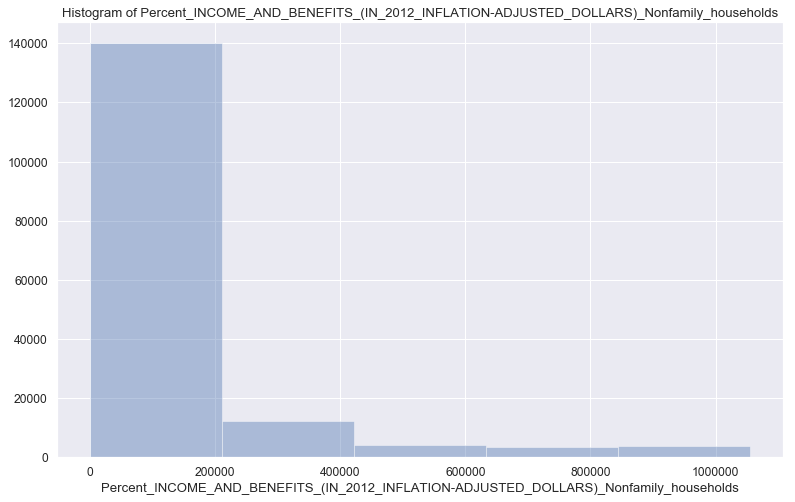

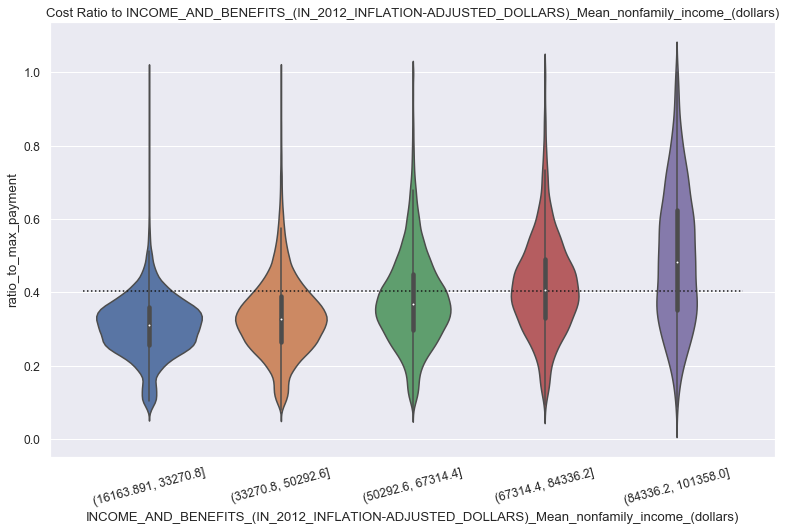

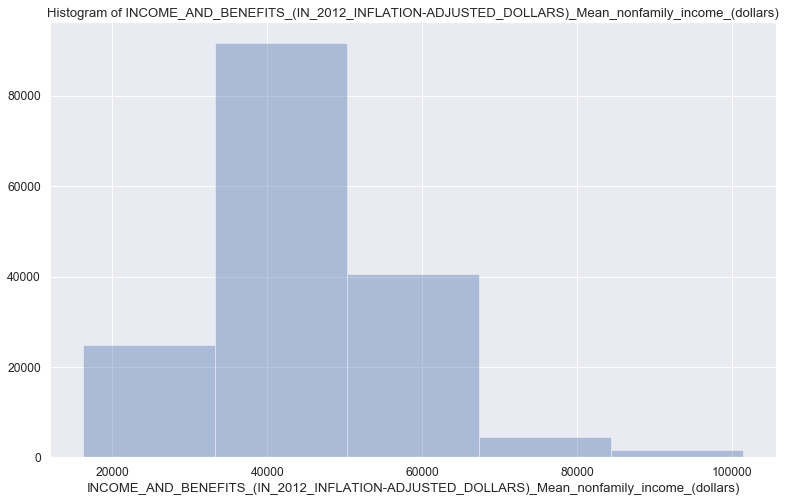

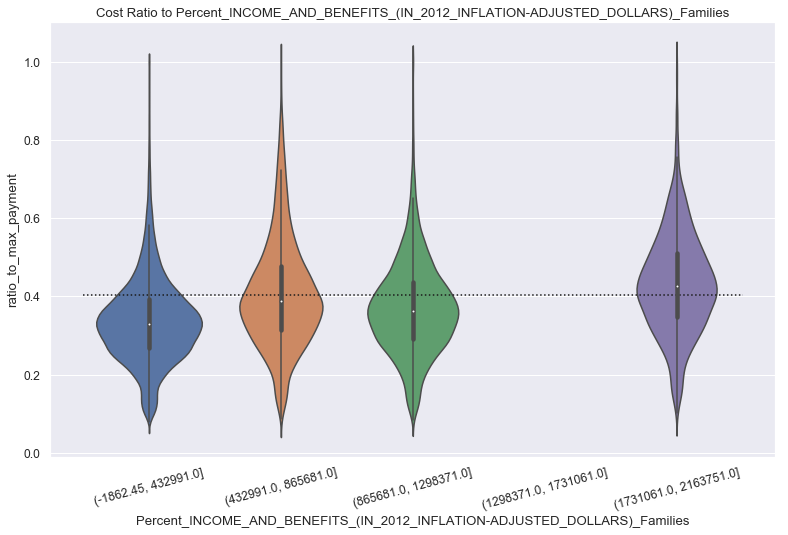

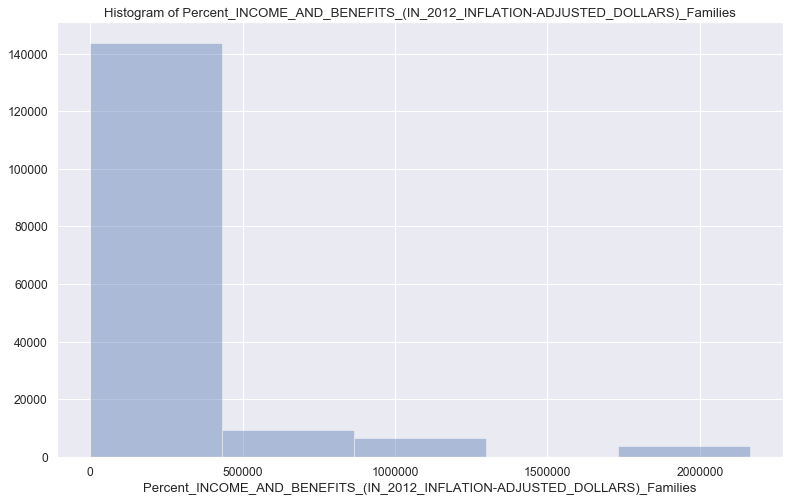

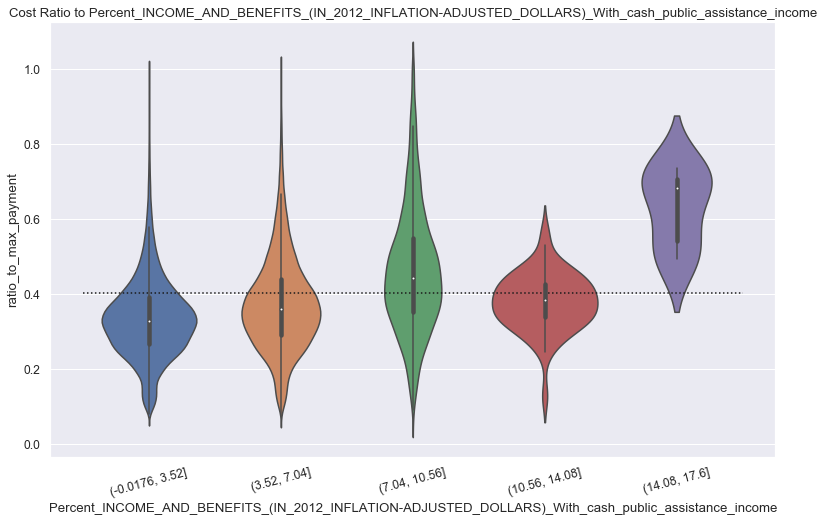

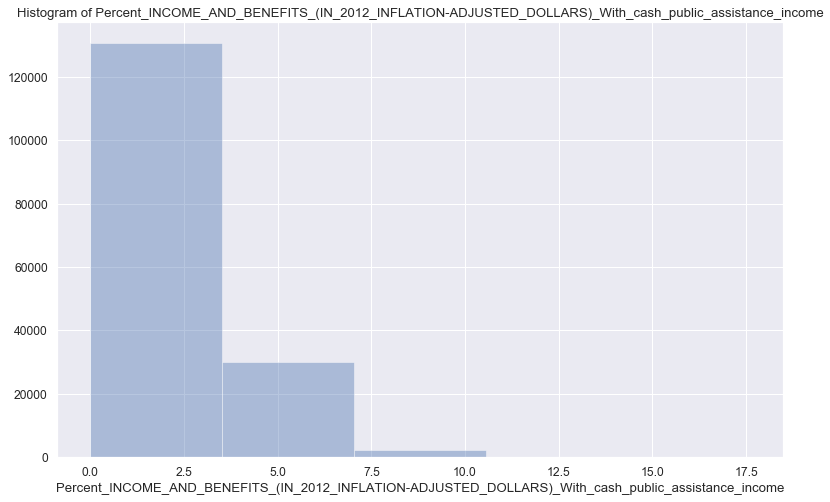

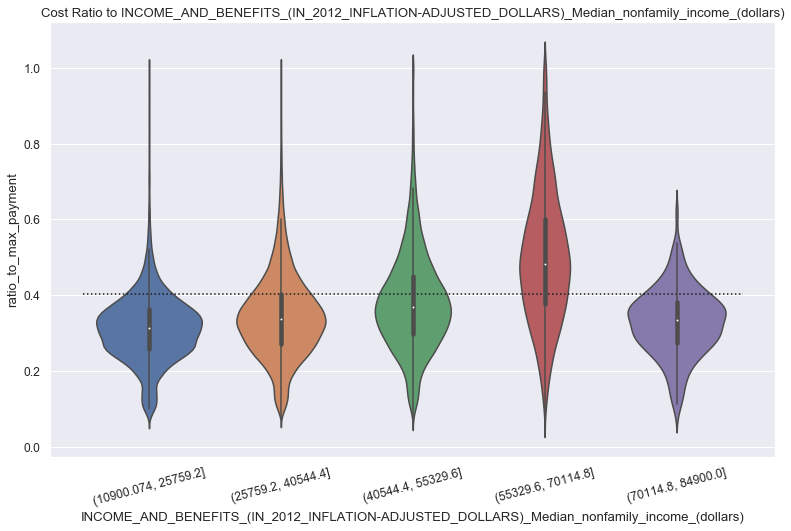

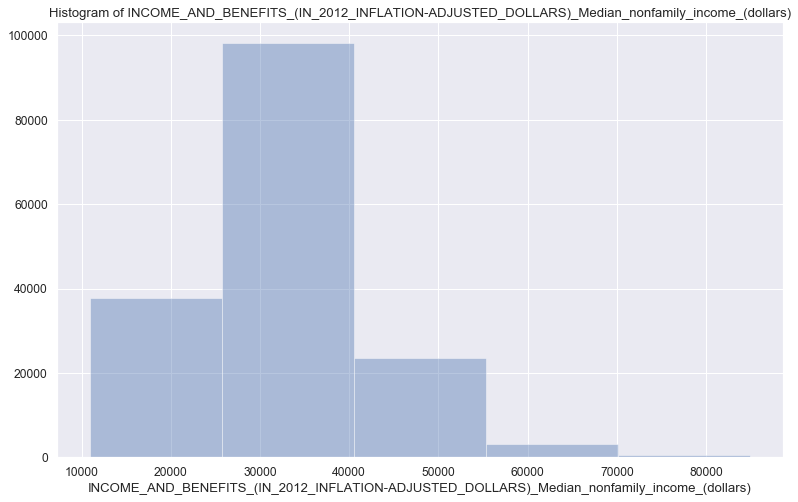

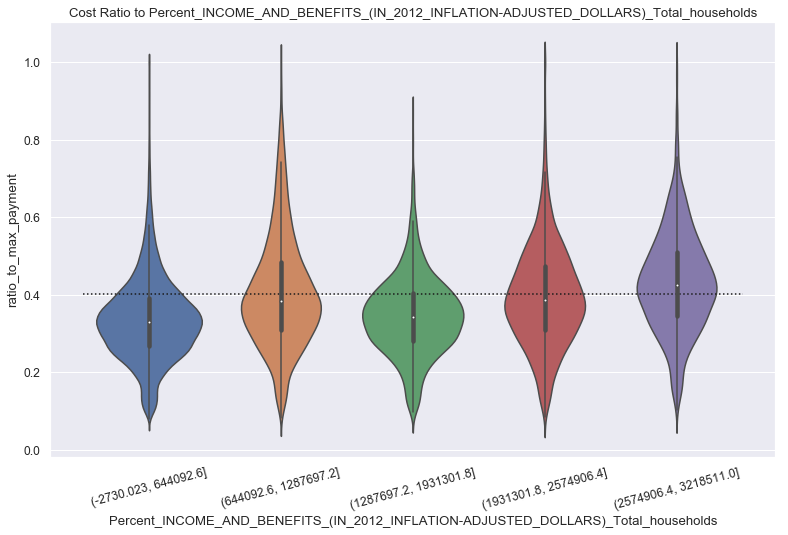

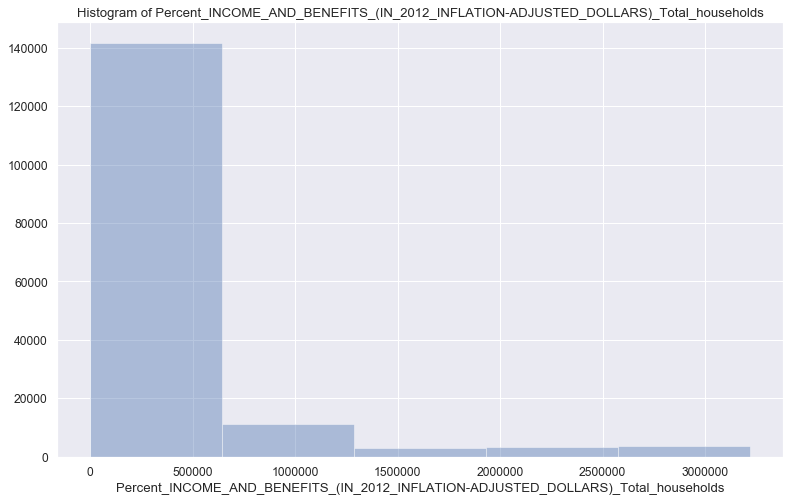

In [18]:
count = 0
for j in a.index:
    try:
        if 'INCOME_AND_BENEFITS' in j:
            bins=5
            plot_=df[[j, target]]
            plot_[j] = pd.cut(plot_[j], bins)

            plt.figure(figsize=(13,8))

            sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
            plt.xticks(rotation=15)
            plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
            plt.show
            plt.figure(figsize=(13,8))
            sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
            plt.show()
            if count > 5:
                break
            count +=1
    except:
        continue

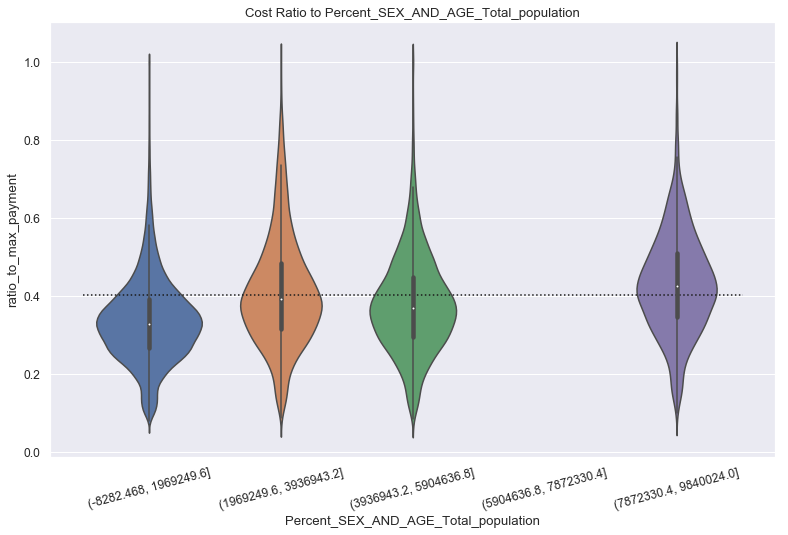

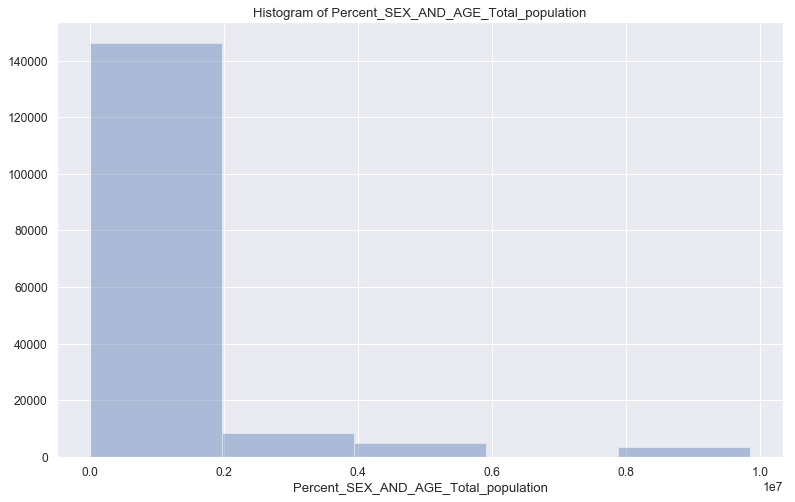

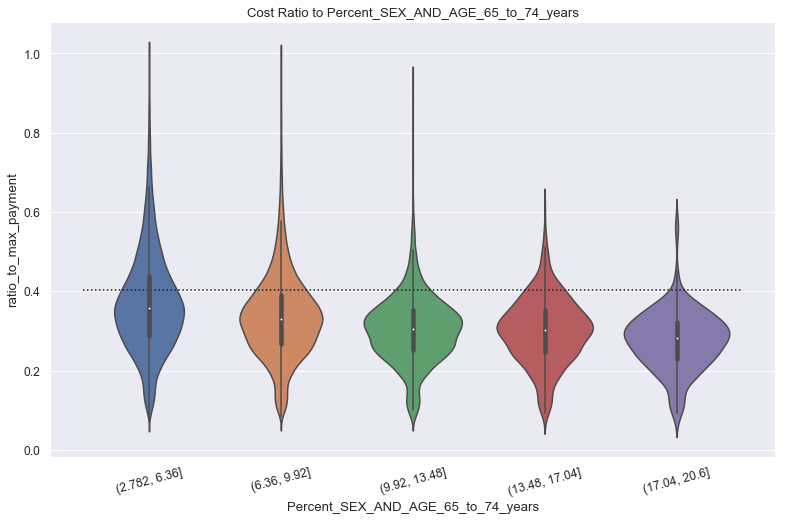

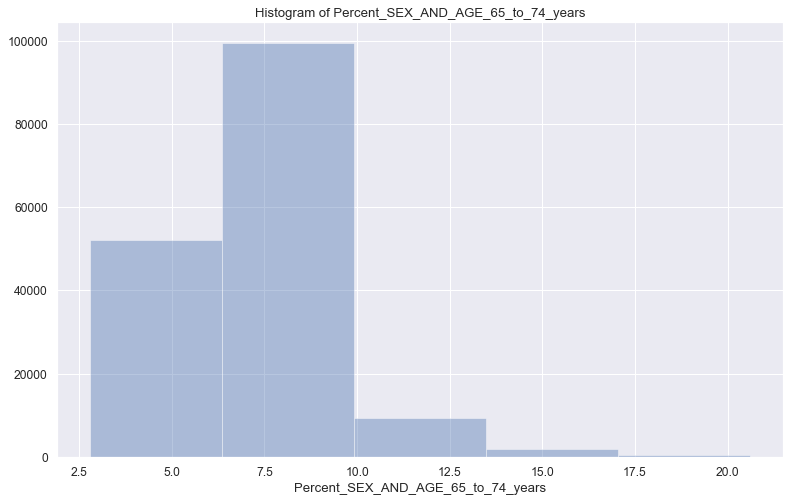

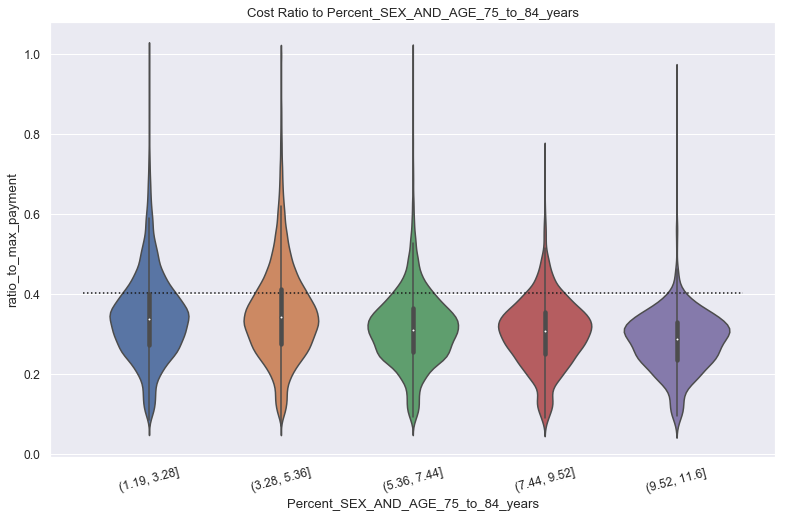

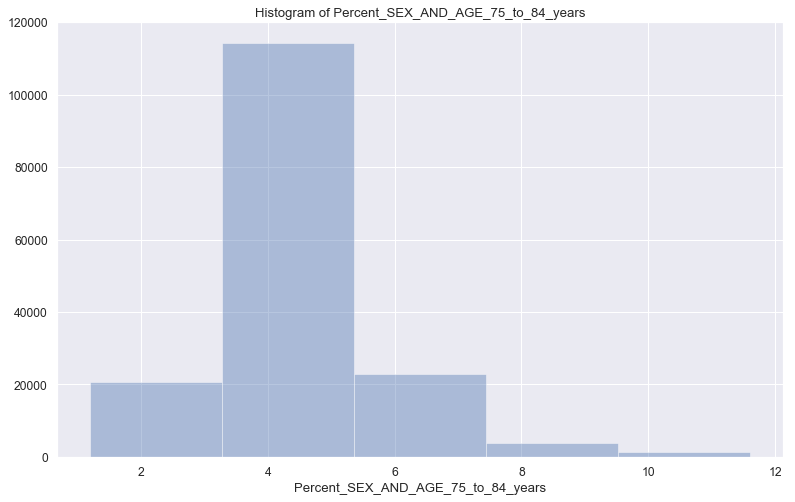

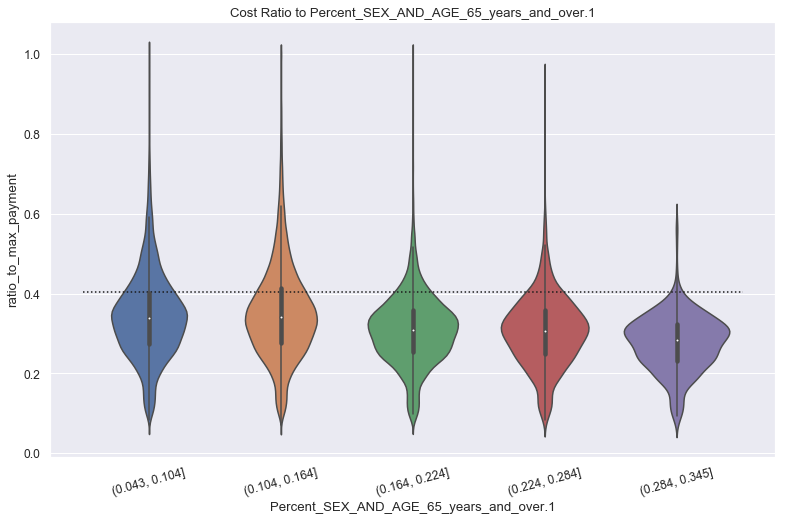

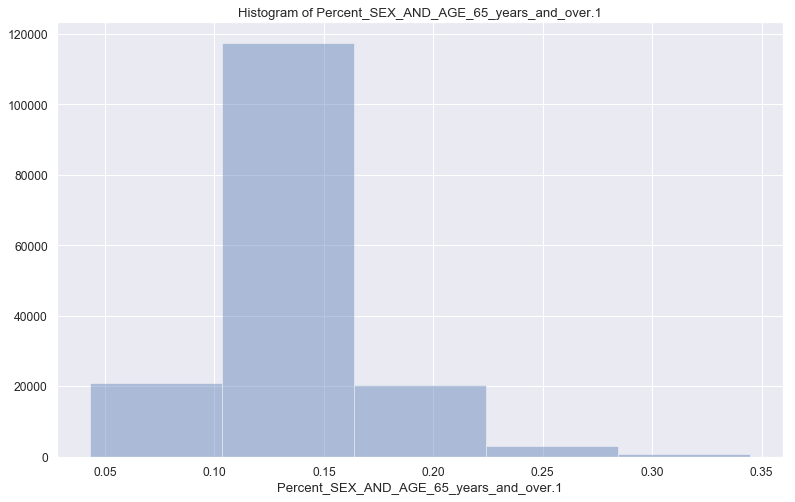

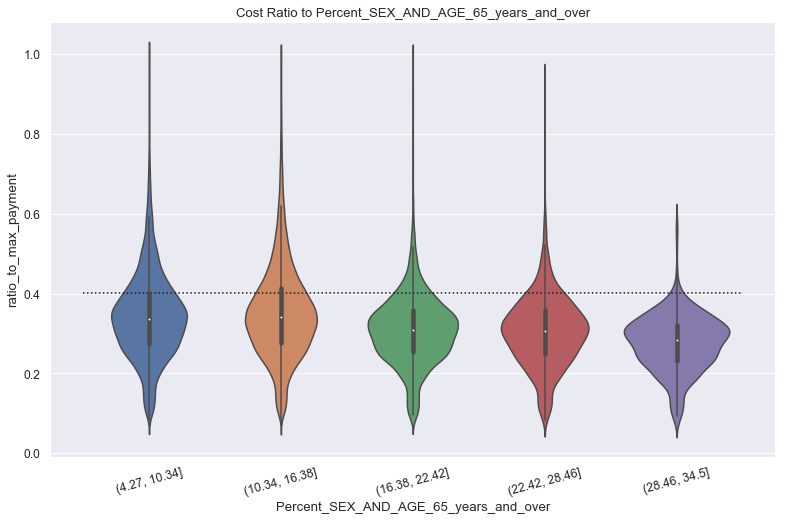

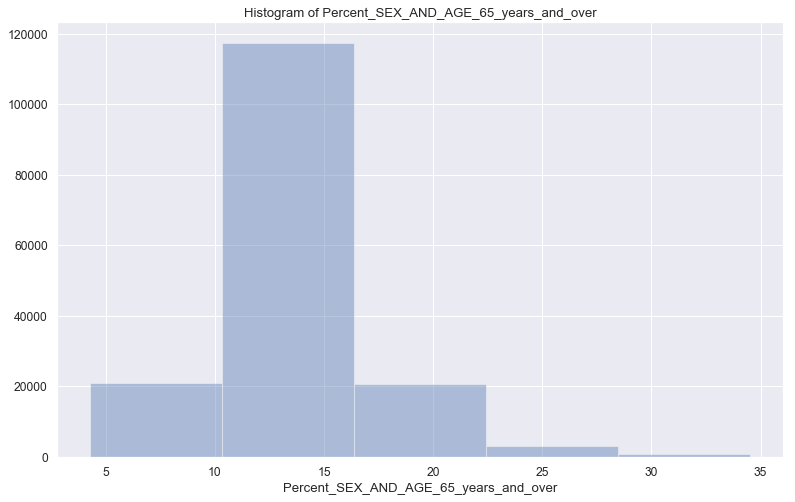

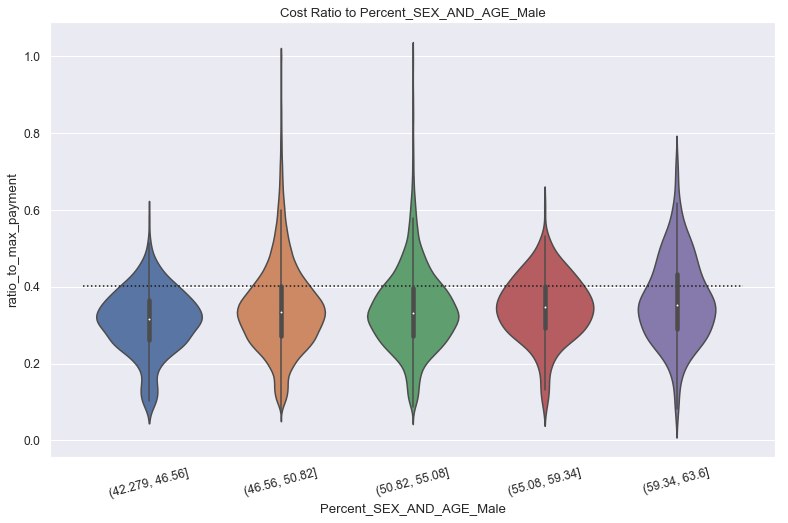

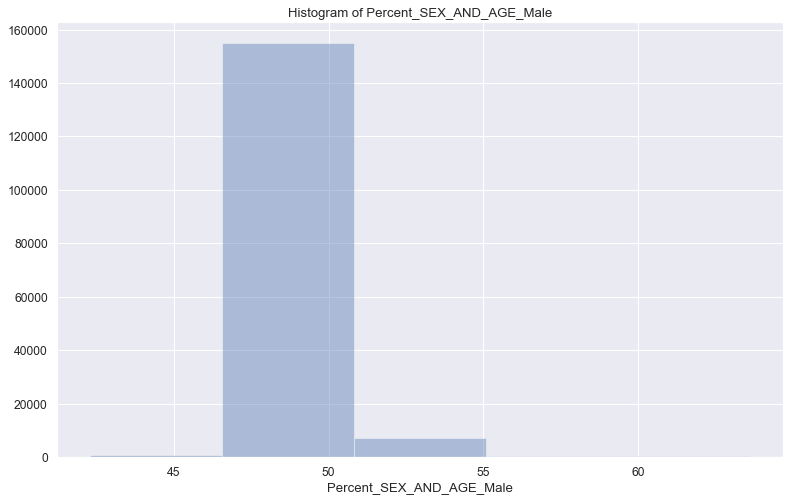

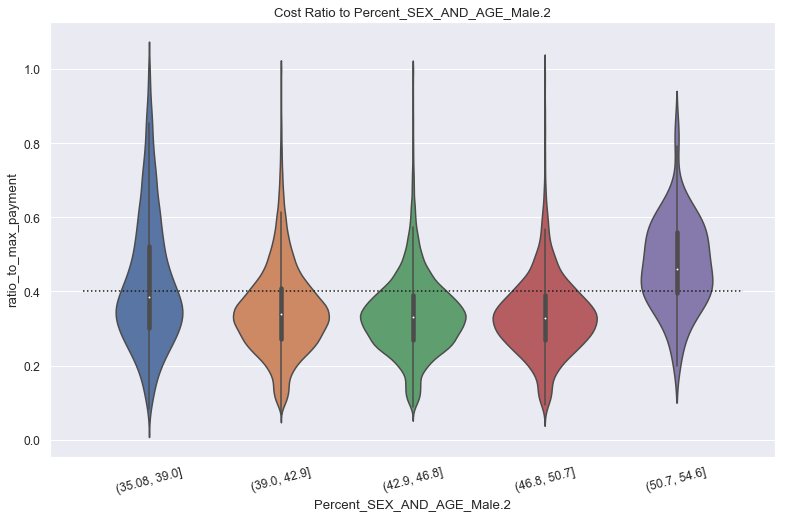

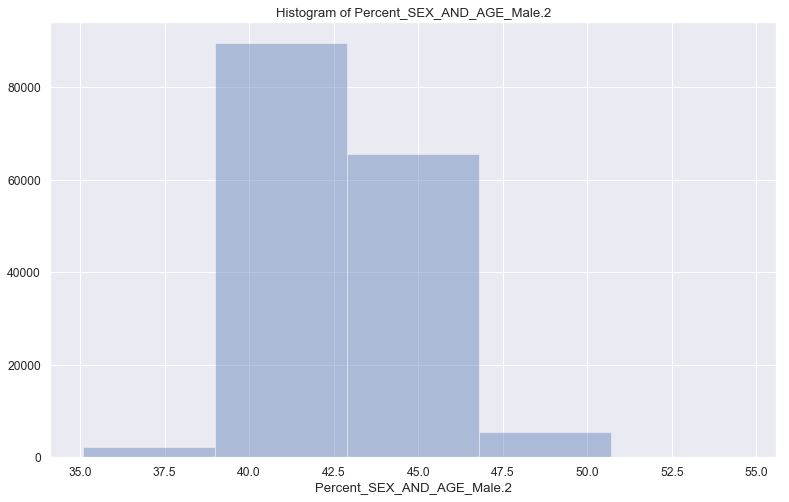

In [19]:
count = 0
for j in a.index:
    if '_SEX_AND_AGE_' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        if count > 5:
            break
        count +=1

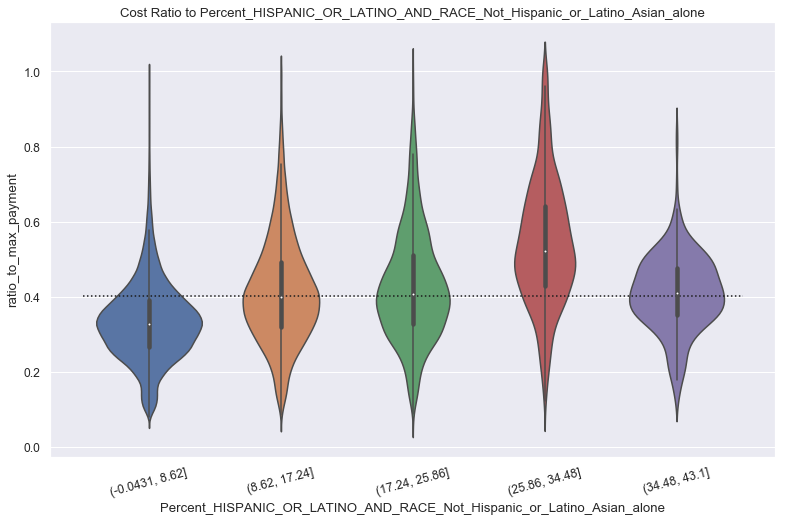

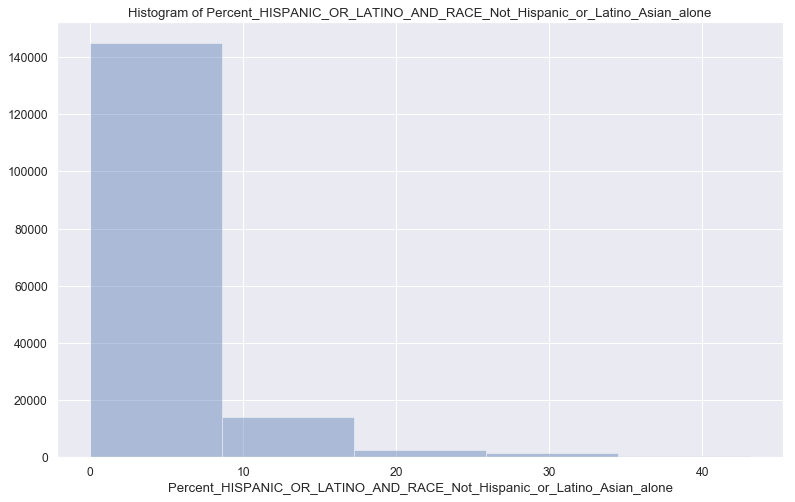

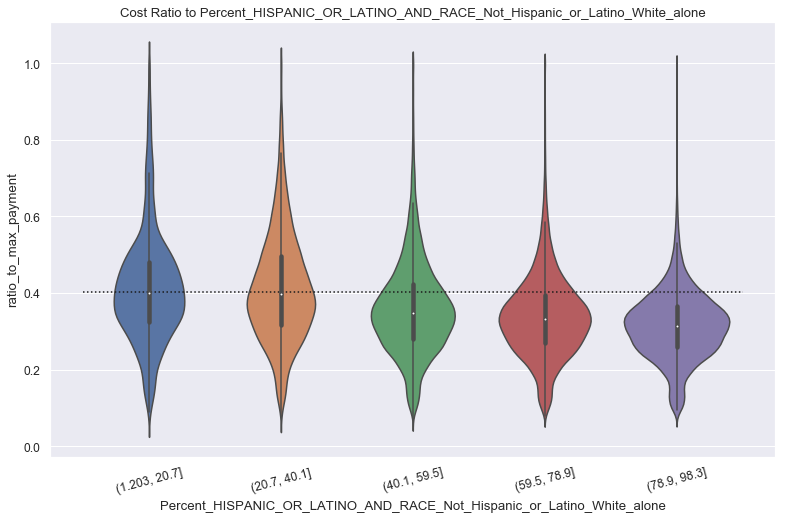

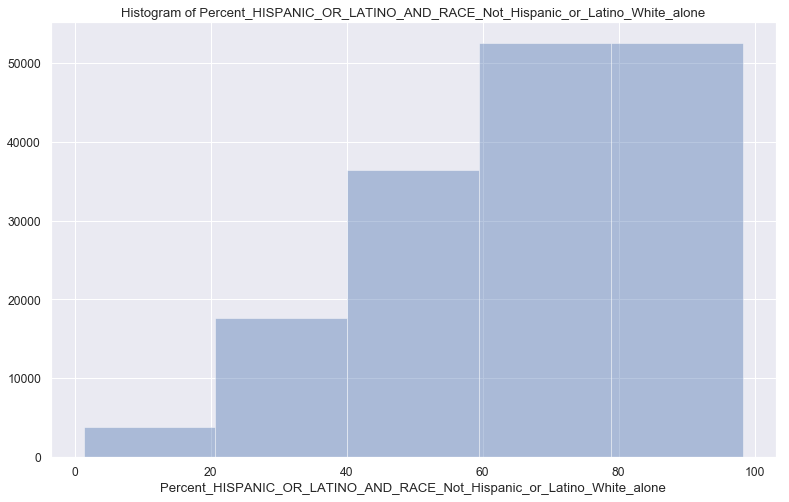

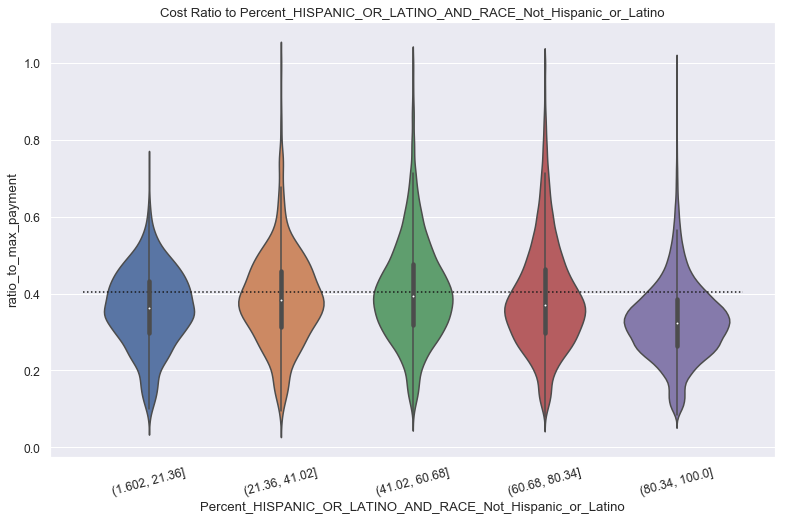

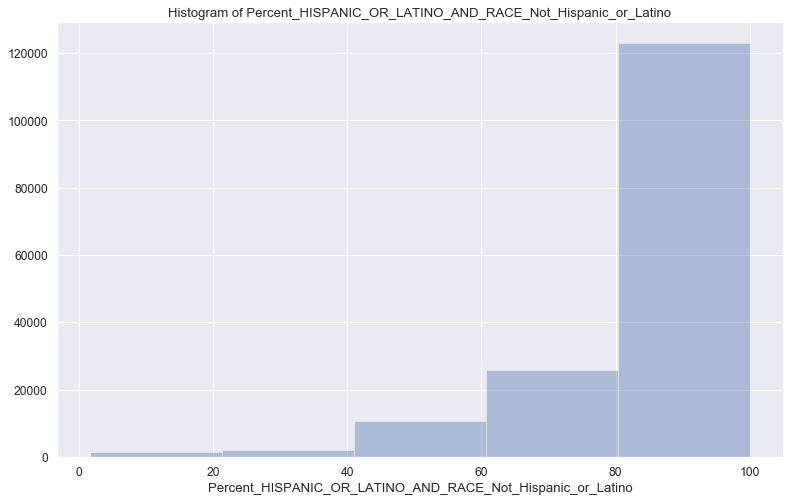

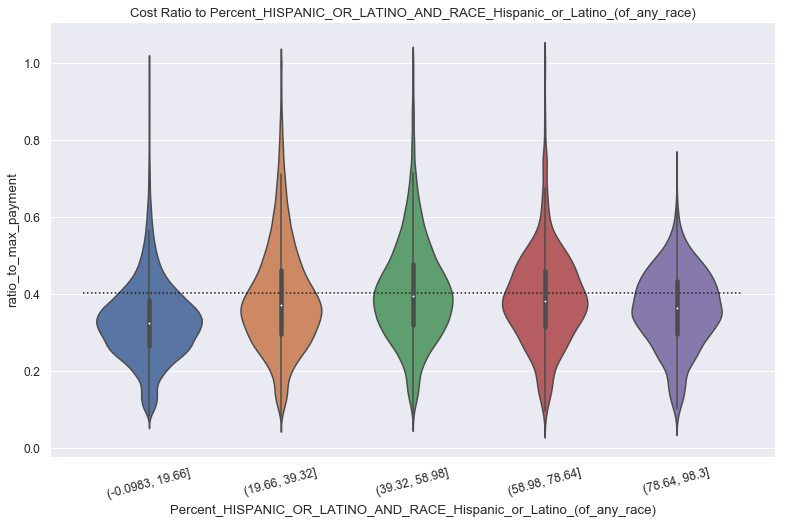

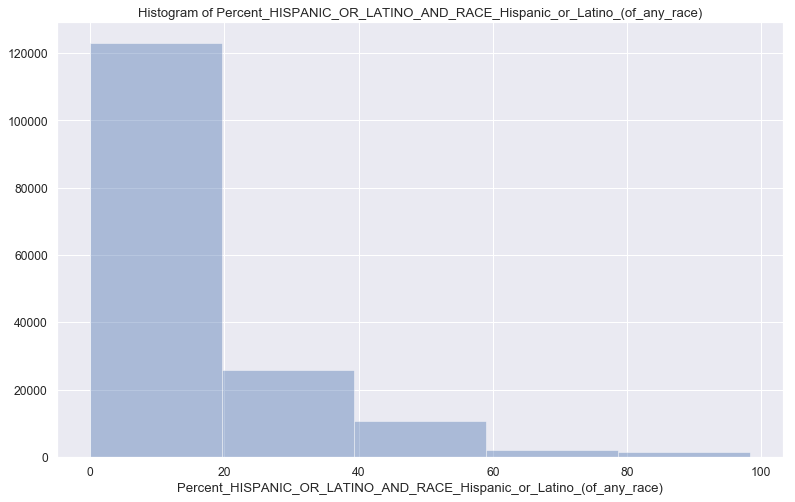

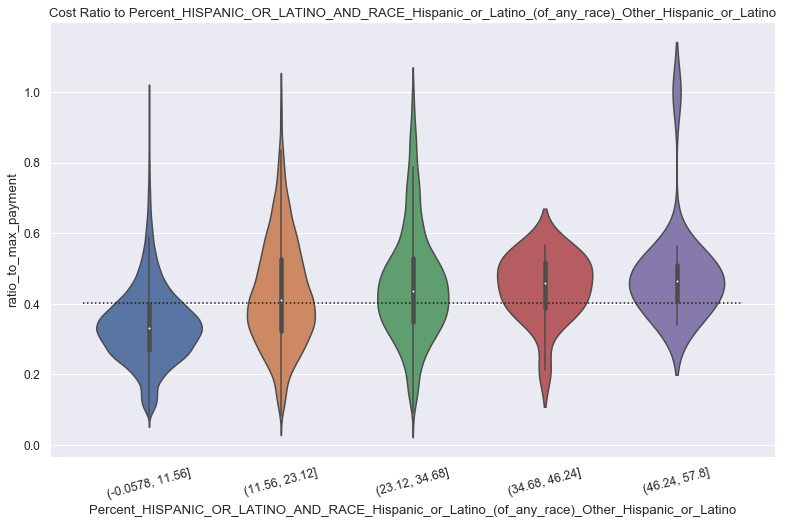

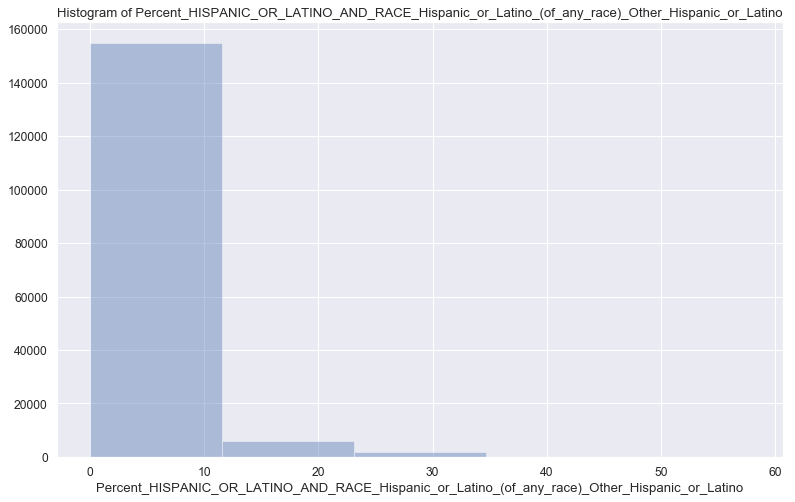

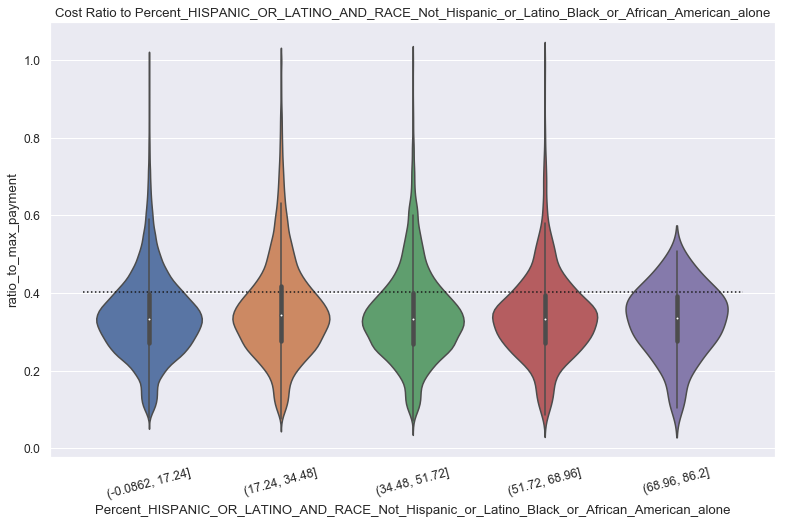

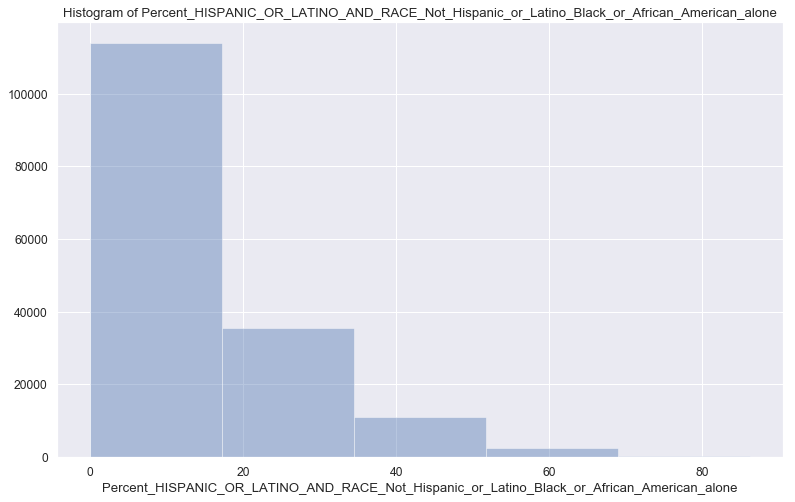

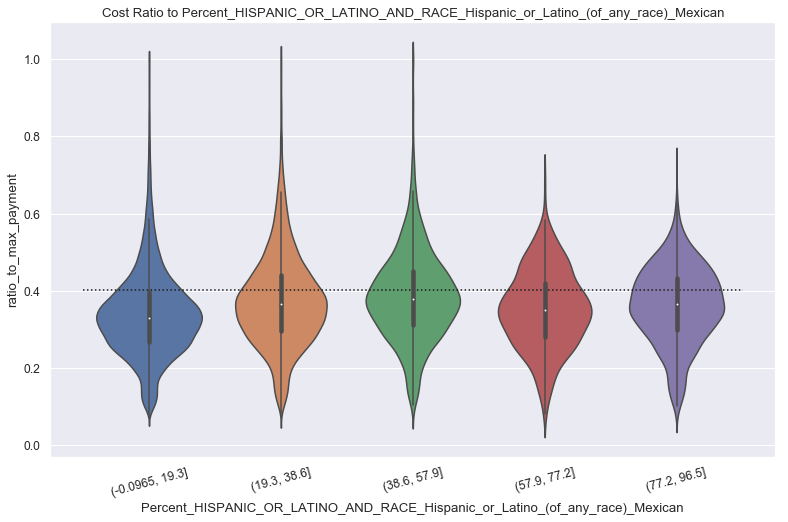

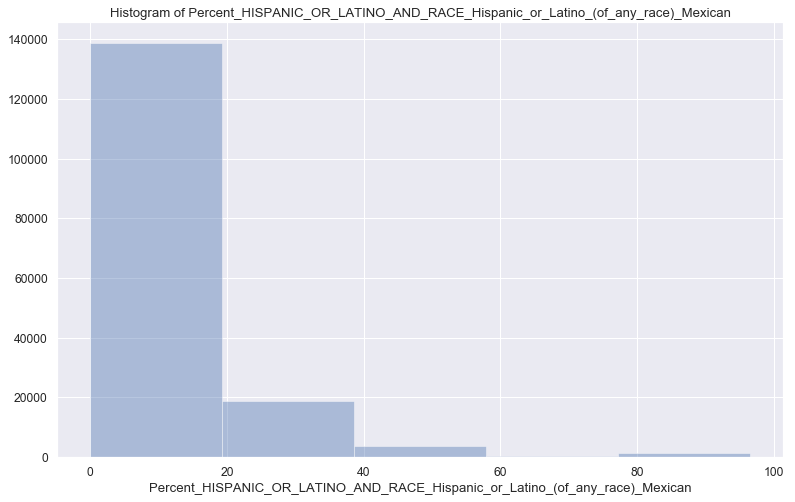

In [20]:
count = 0
for j in a.index:
    if '_HISPANIC_OR_LATINO_AND_RACE_' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        if count > 5:
            break
        count +=1

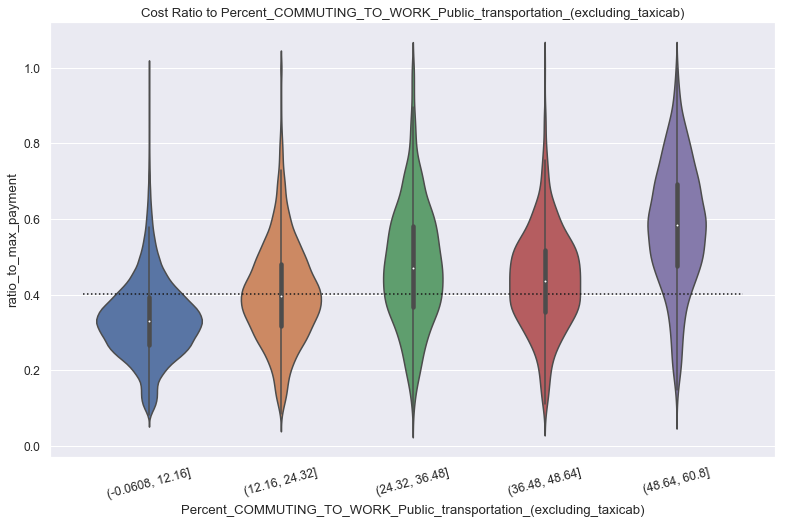

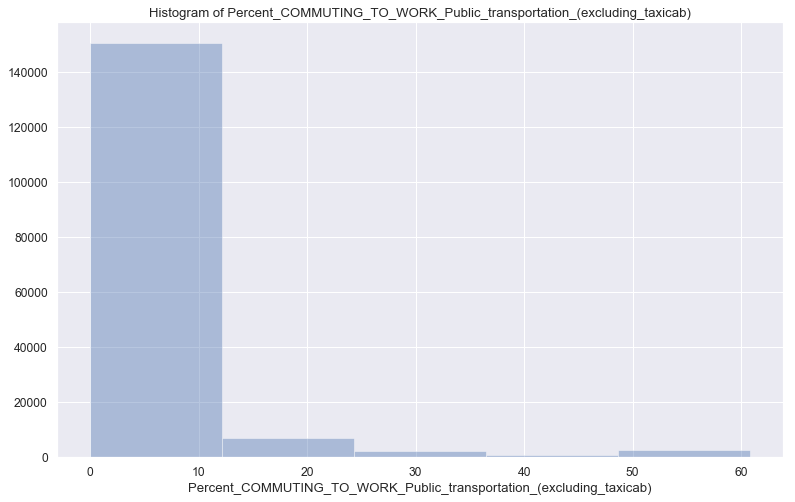

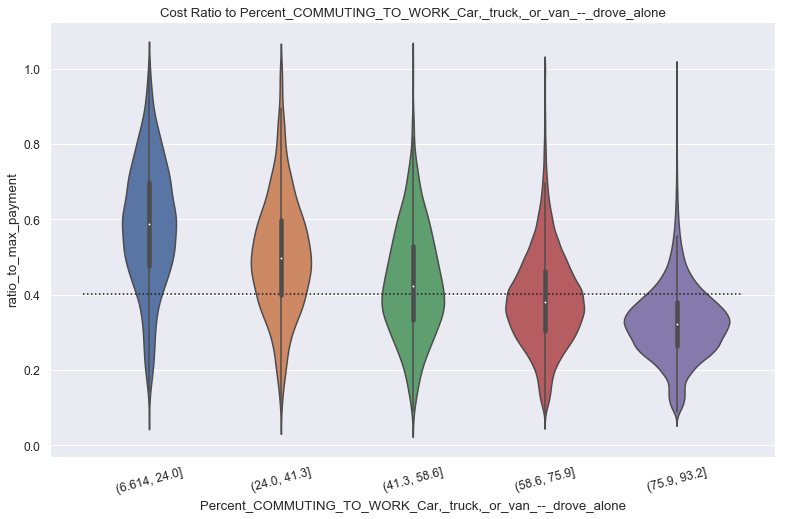

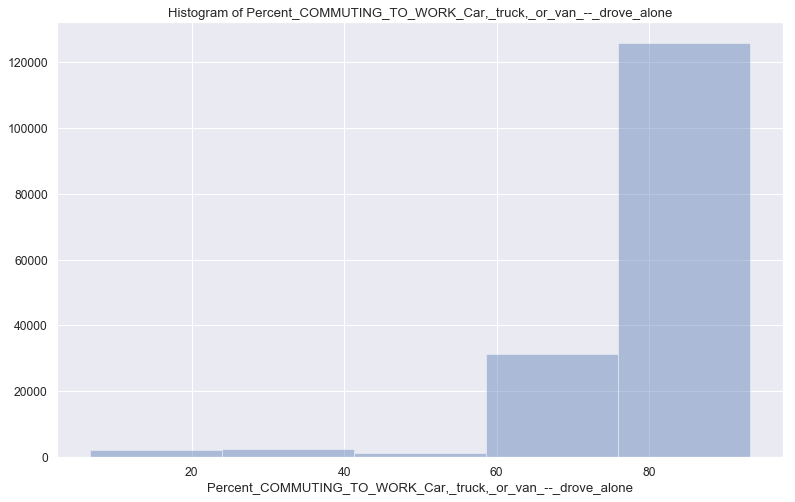

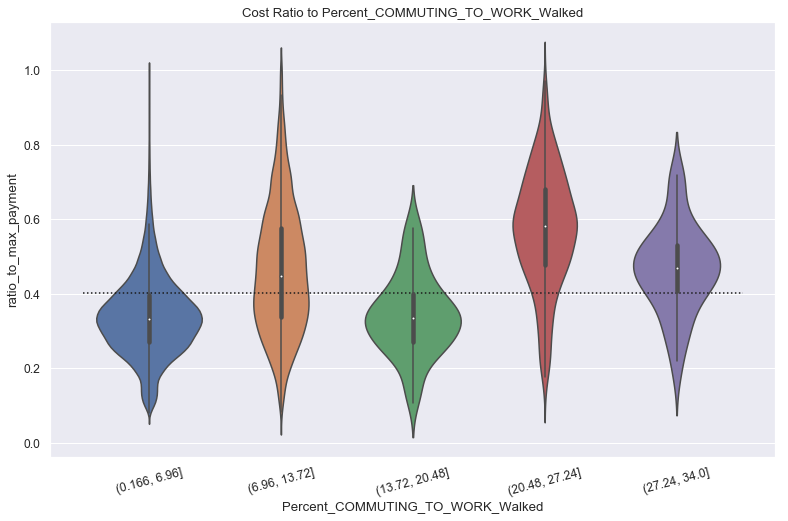

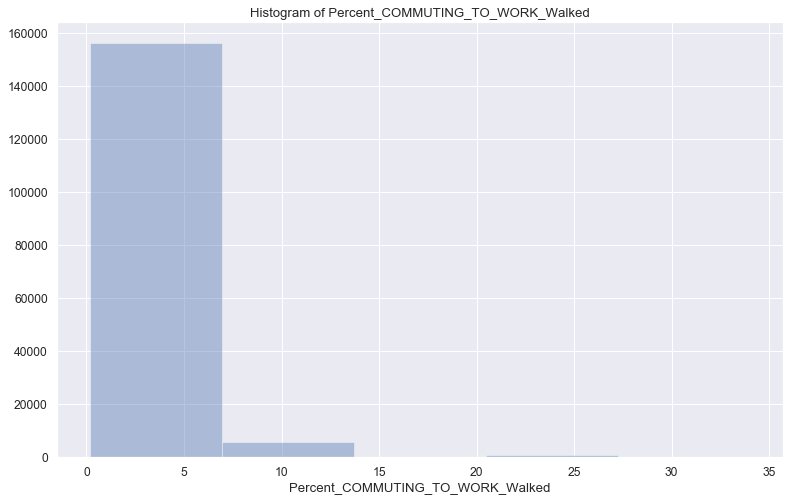

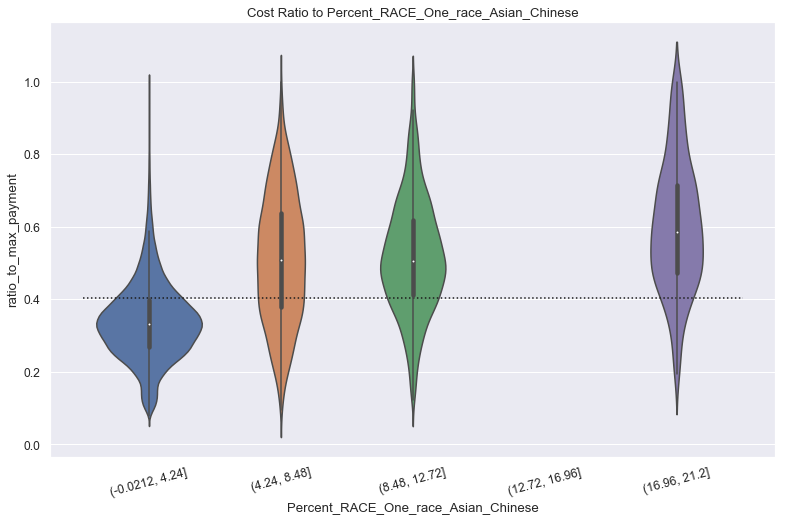

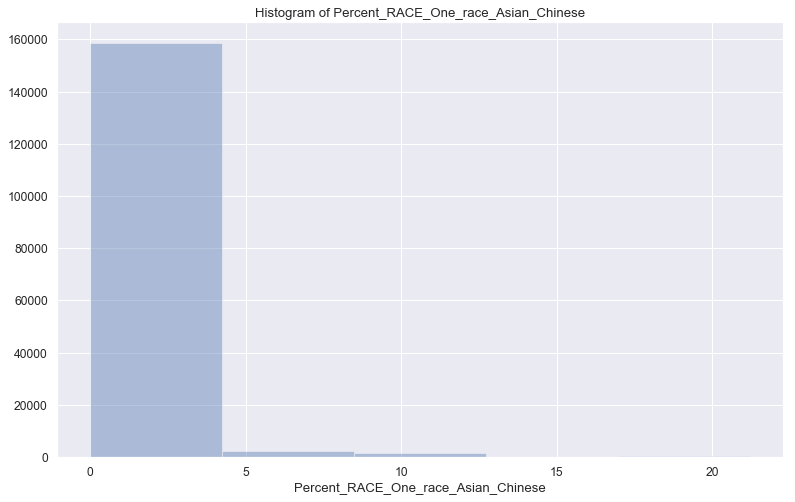

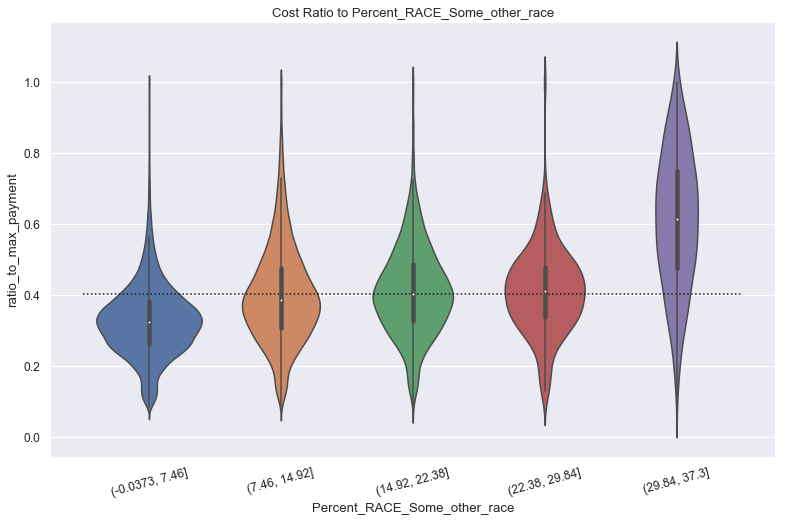

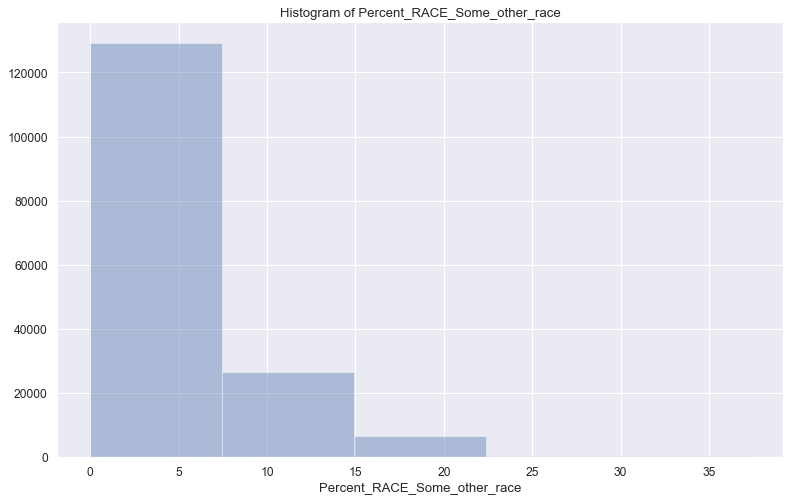

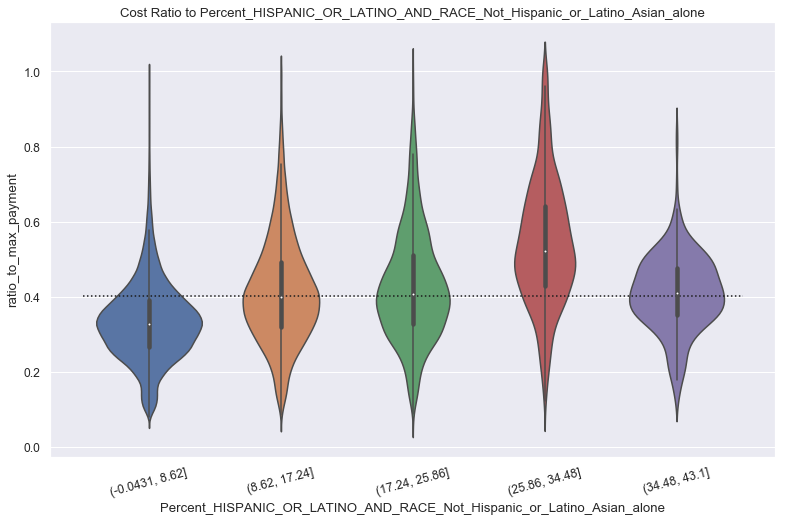

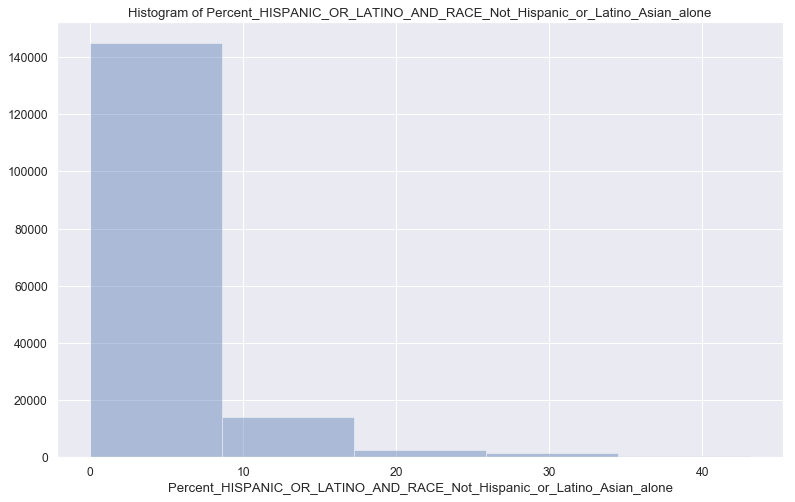

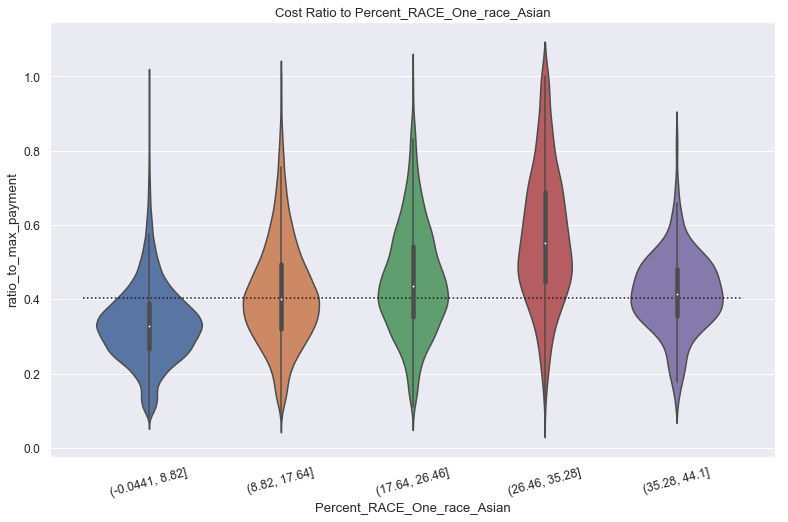

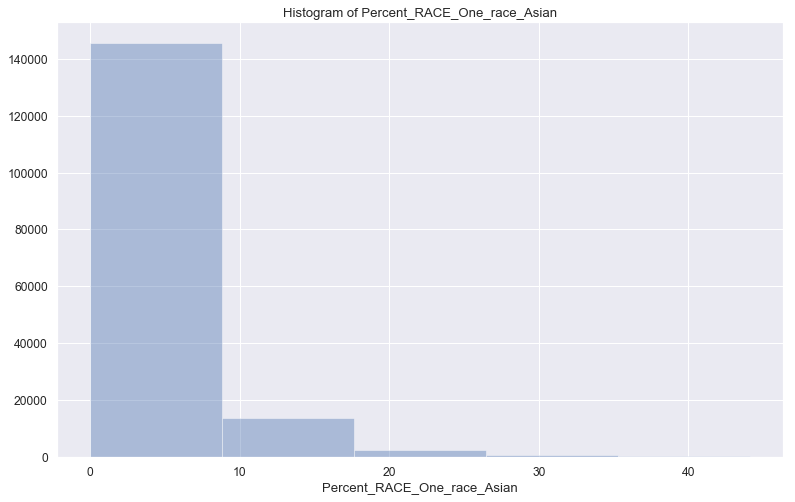

In [21]:
count = 0
for j in a.index:
    bins=5
    plot_=df[[j, target]]
    plot_[j] = pd.cut(plot_[j], bins)
    plt.figure(figsize=(13,8))
    sns.set(font_scale=1.1)
     
    sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
    plt.xticks(rotation=15)
    plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
    plt.show
    plt.figure(figsize=(13,8))
    sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
    plt.show()
    if count > 5:
        break
    count +=1

In [22]:
a = feat_1.drop(index = model.cms_label_df.columns)
count = 0
for j in a.index:
    bins=5
    plot_=df[[j, target]]
    plot_[j] = pd.cut(plot_[j], bins)
    plt.figure(figsize=(13,8))
    sns.set(font_scale=1.1)
     
    sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
    plt.xticks(rotation=15)
    plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
    plt.show
    plt.figure(figsize=(13,8))
    sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
    plt.show()
    if count > 5:
        break
    count +=1

KeyError: "['ratio_to_max_payment'] not found in axis"

In [ ]:
a = feat_2.drop(index = model.cms_label_df.columns)
count = 0
for j in a.index:
    bins=5
    plot_=df[[j, target]]
    plot_[j] = pd.cut(plot_[j], bins)
    plt.figure(figsize=(13,8))
    sns.set(font_scale=1.1)
     
    sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
    plt.xticks(rotation=15)
    plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
    plt.show
    plt.figure(figsize=(13,8))
    sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
    plt.show()
    if count > 5:
        break
    count +=1

In [23]:
for i in model.initial_df.columns:
    if 'RACE' in i:
        print(i)

RACE_Total_population
Percent_RACE_Total_population
RACE_One_race
Percent_RACE_One_race
RACE_Two_or_more_races
Percent_RACE_Two_or_more_races
RACE_One_race.1
Percent_RACE_One_race.1
RACE_One_race_White
Percent_RACE_One_race_White
RACE_One_race_Black_or_African_American
Percent_RACE_One_race_Black_or_African_American
RACE_One_race_American_Indian_and_Alaska_Native
Percent_RACE_One_race_American_Indian_and_Alaska_Native
RACE_One_race_American_Indian_and_Alaska_Native_Cherokee_tribal_grouping
Percent_RACE_One_race_American_Indian_and_Alaska_Native_Cherokee_tribal_grouping
RACE_One_race_American_Indian_and_Alaska_Native_Chippewa_tribal_grouping
Percent_RACE_One_race_American_Indian_and_Alaska_Native_Chippewa_tribal_grouping
RACE_One_race_American_Indian_and_Alaska_Native_Navajo_tribal_grouping
Percent_RACE_One_race_American_Indian_and_Alaska_Native_Navajo_tribal_grouping
RACE_One_race_American_Indian_and_Alaska_Native_Sioux_tribal_grouping
Percent_RACE_One_race_American_Indian_and_Alaska_N